In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#cite https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
point1 = np.array((0, 0, 0))
point2 = np.array((0, 3, 0))

dist = np.linalg.norm(point1-point2)
print(dist)
point2 = np.array((2, 0, 0))
dist = np.linalg.norm(point1-point2)
print(dist)
point2 = np.array((0, 1, 3))
dist = np.linalg.norm(point1-point2)
print(dist)
point2 = np.array((0, 1, 2))
dist = np.linalg.norm(point1-point2)
print(dist)
point2 = np.array((-1, 0, 1))
dist = np.linalg.norm(point1-point2)
print(dist)
point2 = np.array((1, 1, 1))
dist = np.linalg.norm(point1-point2)
print(dist)

3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/1107571974.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'FPR':FPR, 'TPR':TPR}, ignore_index = True)
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/1107571974.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'FPR':FPR, 'TPR':TPR}, ignore_index = True)
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/1107571974.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'FPR':FPR, 'TPR':TPR}, ignore_index = True)
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/1107571974.py:27: FutureWarning: The frame.append method is deprecated 

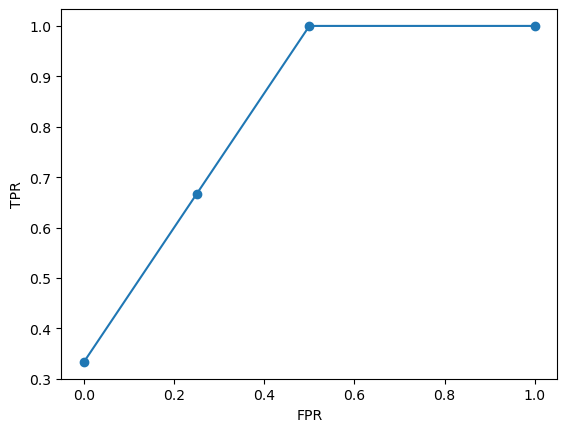

In [532]:
#question 5 - make a ROC curve
# credit to pseudocode provided in Lecture 6 of CS 760, Fall 2023
df = {'c': [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1],
     'class': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]}
TP = 0
FP = 0
last_TP = 0
m = 10
df_pandas = pd.DataFrame(df)
num_neg = len(df_pandas[(df_pandas['class']==0)]['class'])
num_pos = len(df_pandas[(df_pandas['class']==1)]['class'])
results = pd.DataFrame()

for i in range(m):
    if (i > 0) and df_pandas.loc[i, 'c']!=df_pandas.loc[i-1, 'c'] and df_pandas.loc[i, 'class']==0 and TP > last_TP:
        FPR = FP/num_neg
        TPR = TP/num_pos
        results = results.append({'FPR':FPR, 'TPR':TPR}, ignore_index = True)
        last_TP = TP
    if df_pandas.loc[i, 'class']==1:
        TP = TP + 1
    else:
        FP = FP + 1

FPR = FP/num_neg
TPR = TP/num_pos
results = results.append({'FPR':FPR, 'TPR':TPR}, ignore_index = True)

#cite https://stackoverflow.com/questions/20130227/matplotlib-connect-scatterplot-points-with-line-python
#results.plot.line(x = 'FPR', y = 'TPR')
plt.plot('FPR', 'TPR', data = results)
plt.scatter('FPR', 'TPR', data = results)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.savefig("./HW/HW3/ROC_curve.png")

In [456]:
def predict_KNN(train_data, test_data, k):
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    print(train_data.shape)
    print(test_data.shape)
    dist_matrix = pd.DataFrame(distance_matrix(train_data.iloc[:,0:(train_data.shape[1]-1)], test_data.iloc[:, 0:(test_data.shape[1]-1)]), index=train_data.index, columns=test_data.index)
    test_data['pred'] = dist_matrix.apply(lambda col: np.argpartition(col,k),axis=0).iloc[:k]\
                .apply(lambda col: train_data.filter(items = col.values, axis = 0)['Prediction'].reset_index(drop=True), axis = 1)\
                 .mean(axis = 0)
#     x = dist_matrix.apply(lambda col: np.argpartition(col,k),axis=0).iloc[:k]
#     print(x)
#     y = x.apply(lambda col: train_data.filter(items = col.values, axis = 0)['Prediction'].reset_index(drop=True).mean(axis = 0))
#     print(y)
    #z = y.mean(axis = 1)
    #print(z)
#     print(test_data)
#     print(dist_matrix.apply(lambda col: np.argpartition(col,k),axis=0).iloc[:k]\
#                 .apply(lambda col: train_data.filter(items = col.values, axis = 0)[2].reset_index(drop = True), axis = 1)\
#                 .mode(axis = 0).iloc[0])
    return test_data


(200, 3)
(1600, 3)


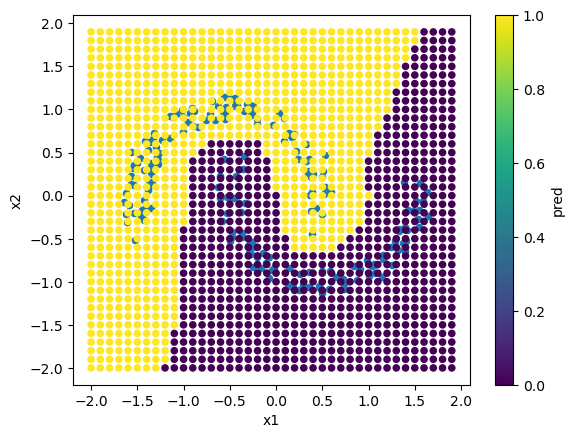

In [533]:
#KNN
#cite https://stackoverflow.com/questions/29481485/creating-a-distance-matrix
from scipy.spatial import distance_matrix
data = np.loadtxt("./HW/hw3Data/D2z.txt")
train_data = pd.DataFrame(data, columns = ['x1', 'x2', 'Prediction'])

x = np.arange(-2,2,.1)
y = np.arange(-2,2,.1)
x1,x2=np.meshgrid(x,y)
test_data = pd.DataFrame(zip(x1.flatten(),x2.flatten()))
test_data['Prediction'] = 1


one_kNN = predict_KNN(train_data, test_data, 1)
ax = train_data.plot.scatter(0,1)
one_kNN.plot.scatter(0, 1, ax = ax, c = 'pred')
ax.set_ylabel('x2')
ax.set_xlabel('x1')
plt.savefig("./HW/KNN_q1.png")

In [402]:
#Part 2 question 2. Spam filter
spam = pd.read_csv("./HW/hw3Data/emails.csv")
spam = spam.drop(['Email No.'], axis = 1)
#partition data into train and test sets
all_index = np.arange(0, 5000, 1)
fold_1_test = np.arange(0, 1000, 1)
fold_2_test = np.arange(1000, 2000, 1)
fold_3_test = np.arange(2000, 3000, 1)
fold_4_test = np.arange(3000, 4000, 1)
fold_5_test = np.arange(4000, 5000, 1)

#results_five_foldCV = pd.DataFrame()

def accuracy_precision_recall(df, fold_id):
    df['true_label'] = spam['Prediction'].iloc[fold_id].reset_index(drop=True)
    print(df)
    TP_and_TN = np.sum(df['pred']==df['true_label'])
    denomin = df.shape[0]
    accuracy = TP_and_TN/denomin
    TP = len(df.loc[(df['true_label']==1) & (df['pred']==df['true_label'])])
#     TP = np.sum((df['true_label']==1) and (df['pred']==df['true_label']))
    TP_and_FP = np.sum(df['pred']==1)
    precision = TP/TP_and_FP
    
    TP_and_FN = np.sum(df['true_label']==1)
    recall = TP/TP_and_FN
    return [accuracy, precision, recall]
    
def run_one_fold(k, train_id, fold_id):
    print(spam.iloc[fold_id])
    print(spam.iloc[train_id])
    test_pred_df = predict_KNN(spam.iloc[train_id], spam.iloc[fold_id], k)
    res = accuracy_precision_recall(test_pred_df, fold_id)
    print(res)
    return pd.DataFrame.from_records([{'k':k, 'accuracy': res[0],
                         'precision':res[1], 'recall':res[2]}]), test_pred_df

def run_five_fold(k):
    one = run_one_fold(k, np.delete(all_index, fold_1_test), fold_1_test)[0]
    two = run_one_fold(k, np.delete(all_index, fold_2_test), fold_2_test)[0]
    three = run_one_fold(k, np.delete(all_index, fold_3_test), fold_3_test)[0]
    four = run_one_fold(k, np.delete(all_index, fold_4_test), fold_4_test)[0]
    five = run_one_fold(k, np.delete(all_index, fold_5_test), fold_5_test)[0]
#    t = run_one_fold(k, np.arange(41, 100, 1), np.arange(0, 40, 1))
    final = pd.concat([one, two, three, four, five])
    final['fold'] = [1, 2, 3, 4, 5]
    
    final_preds = pd.concat([one[1], two[1], three[1], four[1], five[1]])
    return final, final_preds
    


In [ ]:
one_nn = run_five_fold(1)
one_nn.to_latex()
# print(fold_1_test.shape)

In [295]:
print(one_nn.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  k &  accuracy &  precision &    recall &  fold \\
\midrule
0 &  1 &     0.825 &   0.654494 &  0.817544 &     1 \\
0 &  1 &     0.853 &   0.685714 &  0.866426 &     2 \\
0 &  1 &     0.862 &   0.721212 &  0.838028 &     3 \\
0 &  1 &     0.851 &   0.716418 &  0.816327 &     4 \\
0 &  1 &     0.775 &   0.605744 &  0.758170 &     5 \\
\bottomrule
\end{tabular}



/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/2539730384.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(one_nn.to_latex())


In [541]:
#question 4 - build logistic regression model from scratch
spam_matrix = spam.to_numpy()
x_train = spam_matrix[:,0:(spam_matrix.shape[0]-1)]
y_train = spam_matrix[:,-1]

## Attribution: Hugh Liu's CS540 P1 Solution 2020, available online through summer 2023 CS 540 website
def logistic_regression(test_id, train_id):
    x = x_train[train_id]
    y = y_train[train_id]
    
    x_test = x_train[test_id]
    y_test = y_train[test_id]
    
    num_epochs = 5000

    m = x.shape[1]

    w = np.ones(m)
    b = np.ones(1)
    loss_previous = 10e10
    lowest_loss = 1e6
    for alpha in np.linspace(0.000001, 0.99, 40):
            w = np.ones(m)
            b = np.ones(1)
        for epoch in range(num_epochs):
            print(alpha, epoch)
            a = x@w + b
            a = (1/(1+np.exp(-a)))
            # bound items in a to avoid log(0):
            a = np.clip(a, .001, .999)

            w -= alpha * (x.T)@(a-y)

            b -= alpha * (a-y).sum()
            loss = - np.sum(y*np.log(a) + (1-y)*np.log(1-a))
            loss_reduction = loss_previous - loss
            loss_previous = loss
            if loss < lowest_loss:
                w_best = w
                b_best = b
                alpha_best = alpha
                lowest_loss = loss
            accuracy = sum((a>0.5).astype(int) == y) / len(y)
            

#             print('alpha = ', alpha, 'b = ', b, 'epoch = ', epoch, ' loss = {:.7}'.format(loss), \
#                   ' loss reduction = {:.7}'.format(loss_reduction), \
#                   ' correctly classified = {:.4%}'.format(accuracy))
            if abs(loss_reduction) < 0.001:
                break
    test_a = x_test@w_best + b_best 
    test_pred = 1/(1+np.exp(-test_a))
    df = pd.DataFrame({'pred':test_pred})
    return accuracy_precision_recall(df, test_id), test_pred


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 25)

In [491]:
lr1, lr1_test_pred = logistic_regression(fold_1_test, np.delete(all_index, fold_1_test))
lr2 = logistic_regression(fold_2_test, np.delete(all_index, fold_2_test))
lr3 = logistic_regression(fold_3_test, np.delete(all_index, fold_3_test))
lr4 = logistic_regression(fold_4_test, np.delete(all_index, fold_4_test))
lr5 = logistic_regression(fold_5_test, np.delete(all_index, fold_5_test))

alpha =  0.6 b =  -1695.571622420976 epoch =  0  loss = 19557.07  loss reduction = 9.999998e+10  correctly classified = 29.2250%
alpha =  0.6 b =  -996.5716224209759 epoch =  1  loss = 8077.998  loss reduction = 11479.07  correctly classified = 70.7750%
alpha =  0.6 b =  -297.5716224209759 epoch =  2  loss = 8077.998  loss reduction = 0.0  correctly classified = 70.7750%
alpha =  0.6205263157894737 b =  -2051.799517157818 epoch =  0  loss = 19557.02  loss reduction = -11479.03  correctly classified = 29.2250%
alpha =  0.6205263157894737 b =  -1328.8863592630814 epoch =  1  loss = 8077.998  loss reduction = 11479.03  correctly classified = 70.7750%
alpha =  0.6205263157894737 b =  -605.9732013683446 epoch =  2  loss = 8077.998  loss reduction = 0.0  correctly classified = 70.7750%


/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:25: RuntimeWarning: overflow encountered in exp
  a = (1/(1+np.exp(-a)))


alpha =  0.6410526315789473 b =  -2418.2289908420285 epoch =  0  loss = 19557.02  loss reduction = -11479.03  correctly classified = 29.2250%
alpha =  0.6410526315789473 b =  -1671.402675052555 epoch =  1  loss = 8077.998  loss reduction = 11479.03  correctly classified = 70.7750%
alpha =  0.6410526315789473 b =  -3031.3407024209755 epoch =  2  loss = 15668.52  loss reduction = -7590.524  correctly classified = 43.3000%
alpha =  0.6410526315789473 b =  -2284.514386631502 epoch =  3  loss = 8077.998  loss reduction = 7590.524  correctly classified = 70.7750%
alpha =  0.6410526315789473 b =  -1537.6880708420285 epoch =  4  loss = 8077.998  loss reduction = 0.0  correctly classified = 70.7750%
alpha =  0.661578947368421 b =  -3407.9717550525547 epoch =  0  loss = 19557.02  loss reduction = -11479.03  correctly classified = 29.2250%
alpha =  0.661578947368421 b =  -2637.232281368344 epoch =  1  loss = 8077.998  loss reduction = 11479.03  correctly classified = 70.7750%
alpha =  0.661578947

alpha =  0.661578947368421 b =  -7851.885515407325 epoch =  55  loss = 8071.092  loss reduction = 8785.392  correctly classified = 70.8000%
alpha =  0.661578947368421 b =  -8063.605049236454 epoch =  56  loss = 5688.264  loss reduction = 2382.828  correctly classified = 79.4250%
alpha =  0.661578947368421 b =  -7424.256477657506 epoch =  57  loss = 7269.908  loss reduction = -1581.644  correctly classified = 73.7000%
alpha =  0.661578947368421 b =  -8913.572571341716 epoch =  58  loss = 16317.76  loss reduction = -9047.849  correctly classified = 40.9500%
alpha =  0.661578947368421 b =  -8146.134376604874 epoch =  59  loss = 8057.278  loss reduction = 8260.479  correctly classified = 70.8500%
alpha =  0.661578947368421 b =  -8386.246516604873 epoch =  60  loss = 5833.303  loss reduction = 2223.975  correctly classified = 78.9000%
alpha =  0.661578947368421 b =  -7751.519735552241 epoch =  61  loss = 7235.374  loss reduction = -1402.071  correctly classified = 73.8250%
alpha =  0.661578

alpha =  0.661578947368421 b =  -11842.853615552234 epoch =  119  loss = 7028.172  loss reduction = 2161.814  correctly classified = 74.5750%
alpha =  0.661578947368421 b =  -12571.555039762761 epoch =  120  loss = 9162.359  loss reduction = -2134.187  correctly classified = 66.8500%
alpha =  0.661578947368421 b =  -11970.501303973288 epoch =  121  loss = 6966.011  loss reduction = 2196.348  correctly classified = 74.8000%
alpha =  0.661578947368421 b =  -12664.209171341708 epoch =  122  loss = 8865.368  loss reduction = -1899.358  correctly classified = 67.9250%
alpha =  0.661578947368421 b =  -12077.681062920656 epoch =  123  loss = 6855.503  loss reduction = 2009.866  correctly classified = 75.2000%
alpha =  0.661578947368421 b =  -12781.292767131183 epoch =  124  loss = 8955.156  loss reduction = -2099.653  correctly classified = 67.6000%
alpha =  0.661578947368421 b =  -12198.726193446972 epoch =  125  loss = 6841.689  loss reduction = 2113.467  correctly classified = 75.2500%
alp

alpha =  0.661578947368421 b =  -11349.810581868018 epoch =  178  loss = 8637.445  loss reduction = -1933.891  correctly classified = 68.7500%
alpha =  0.661578947368421 b =  -10771.205542920648 epoch =  179  loss = 6703.554  loss reduction = 1933.891  correctly classified = 75.7500%
alpha =  0.661578947368421 b =  -11437.842922920649 epoch =  180  loss = 8444.056  loss reduction = -1740.502  correctly classified = 69.4500%
alpha =  0.661578947368421 b =  -10877.06479028907 epoch =  181  loss = 6572.326  loss reduction = 1871.731  correctly classified = 76.2250%
alpha =  0.661578947368421 b =  -11537.759868183808 epoch =  182  loss = 8409.523  loss reduction = -1837.197  correctly classified = 69.5750%
alpha =  0.661578947368421 b =  -10981.603526078545 epoch =  183  loss = 6565.419  loss reduction = 1844.104  correctly classified = 76.2500%
alpha =  0.661578947368421 b =  -11635.696046078545 epoch =  184  loss = 8368.082  loss reduction = -1802.663  correctly classified = 69.7250%
alp

alpha =  0.661578947368421 b =  -6494.233933446958 epoch =  241  loss = 4900.891  loss reduction = -462.7526  correctly classified = 82.2750%
alpha =  0.661578947368421 b =  -6682.84612186801 epoch =  242  loss = 4714.409  loss reduction = 186.4824  correctly classified = 82.9500%
alpha =  0.661578947368421 b =  -6289.112703973274 epoch =  243  loss = 5280.763  loss reduction = -566.3539  correctly classified = 80.9000%
alpha =  0.661578947368421 b =  -6698.250326078537 epoch =  244  loss = 6040.506  loss reduction = -759.743  correctly classified = 78.1500%
alpha =  0.661578947368421 b =  -6186.991377657484 epoch =  245  loss = 5943.811  loss reduction = 96.69457  correctly classified = 78.5000%
alpha =  0.661578947368421 b =  -6987.660682920642 epoch =  246  loss = 9390.282  loss reduction = -3446.471  correctly classified = 66.0250%
alpha =  0.661578947368421 b =  -6322.562135552221 epoch =  247  loss = 7124.866  loss reduction = 2265.416  correctly classified = 74.2250%
alpha =  0.

alpha =  0.661578947368421 b =  -5888.502834499586 epoch =  305  loss = 4237.843  loss reduction = -221.0162  correctly classified = 84.6750%
alpha =  0.661578947368421 b =  -5896.2049366048495 epoch =  306  loss = 4065.174  loss reduction = 172.6689  correctly classified = 85.3000%
alpha =  0.661578947368421 b =  -5695.926465025902 epoch =  307  loss = 4224.029  loss reduction = -158.8554  correctly classified = 84.7250%
alpha =  0.661578947368421 b =  -5701.647799762744 epoch =  308  loss = 4030.64  loss reduction = 193.3891  correctly classified = 85.4250%
alpha =  0.661578947368421 b =  -5507.971886078534 epoch =  309  loss = 4182.589  loss reduction = -151.9486  correctly classified = 84.8750%
alpha =  0.661578947368421 b =  -5504.4496397627445 epoch =  310  loss = 3961.572  loss reduction = 221.0162  correctly classified = 85.6750%
alpha =  0.661578947368421 b =  -5304.171168183797 epoch =  311  loss = 4210.216  loss reduction = -248.6432  correctly classified = 84.7750%
alpha = 

alpha =  0.6821052631578948 b =  -5327.491548183794 epoch =  2  loss = 4859.451  loss reduction = -20.72026  correctly classified = 82.4250%
alpha =  0.6821052631578948 b =  -5593.433476604847 epoch =  3  loss = 4831.824  loss reduction = 27.62702  correctly classified = 82.5250%
alpha =  0.6821052631578948 b =  -5217.4365923943205 epoch =  4  loss = 4866.357  loss reduction = -34.53377  correctly classified = 82.4000%
alpha =  0.6821052631578948 b =  -5484.059261868005 epoch =  5  loss = 4824.917  loss reduction = 41.44053  correctly classified = 82.5500%
alpha =  0.6821052631578948 b =  -5104.65867239432 epoch =  6  loss = 4900.891  loss reduction = -75.9743  correctly classified = 82.2750%
alpha =  0.6821052631578948 b =  -5378.08875239432 epoch =  7  loss = 4866.357  loss reduction = 34.53377  correctly classified = 82.4000%
alpha =  0.6821052631578948 b =  -4989.8385292364255 epoch =  8  loss = 4976.865  loss reduction = -110.5081  correctly classified = 82.0000%
alpha =  0.682105

alpha =  0.7026315789473684 b =  -3714.260407131157 epoch =  55  loss = 3913.225  loss reduction = -158.8554  correctly classified = 85.8500%
alpha =  0.7026315789473684 b =  -3712.6232755522096 epoch =  56  loss = 3733.65  loss reduction = 179.5756  correctly classified = 86.5000%
alpha =  0.7026315789473684 b =  -3518.8501334469465 epoch =  57  loss = 3871.785  loss reduction = -138.1351  correctly classified = 86.0000%
alpha =  0.7026315789473684 b =  -3516.5117755522097 epoch =  58  loss = 3726.743  loss reduction = 145.0419  correctly classified = 86.5250%
alpha =  0.7026315789473684 b =  -3322.7386334469466 epoch =  59  loss = 3871.785  loss reduction = -145.0419  correctly classified = 86.0000%
alpha =  0.7026315789473684 b =  -3321.101501867999 epoch =  60  loss = 3719.836  loss reduction = 151.9486  correctly classified = 86.5500%
alpha =  0.7026315789473684 b =  -3127.328359762736 epoch =  61  loss = 3857.971  loss reduction = -138.1351  correctly classified = 86.0500%
alpha 

alpha =  0.7026315789473684 b =  -3177.766065025891 epoch =  115  loss = 4631.528  loss reduction = -27.62702  correctly classified = 83.2500%
alpha =  0.7026315789473684 b =  -3396.313996604838 epoch =  116  loss = 4217.122  loss reduction = 414.4053  correctly classified = 84.7500%
alpha =  0.7026315789473684 b =  -3095.9544544995747 epoch =  117  loss = 4369.071  loss reduction = -151.9486  correctly classified = 84.2000%
alpha =  0.7026315789473684 b =  -3243.678528183785 epoch =  118  loss = 3933.945  loss reduction = 435.1256  correctly classified = 85.7750%
alpha =  0.7026315789473684 b =  -2986.7950176574695 epoch =  119  loss = 4092.801  loss reduction = -158.8554  correctly classified = 85.2000%
alpha =  0.7026315789473684 b =  -3079.1222123943116 epoch =  120  loss = 3775.09  loss reduction = 317.7107  correctly classified = 86.3500%
alpha =  0.7026315789473684 b =  -2853.0926597627326 epoch =  121  loss = 3968.479  loss reduction = -193.3891  correctly classified = 85.6500%

alpha =  0.7026315789473684 b =  1912.723840237269 epoch =  173  loss = 6420.377  loss reduction = 1657.621  correctly classified = 76.7750%
alpha =  0.7026315789473684 b =  1000.6630823425324 epoch =  174  loss = 9680.365  loss reduction = -3259.988  correctly classified = 64.9750%
alpha =  0.7026315789473684 b =  1699.3191718162166 epoch =  175  loss = 6993.638  loss reduction = 2686.728  correctly classified = 74.7000%
alpha =  0.7026315789473684 b =  888.9362297109536 epoch =  176  loss = 8720.327  loss reduction = -1726.689  correctly classified = 68.4500%
alpha =  0.7026315789473684 b =  1533.5978928688482 epoch =  177  loss = 6517.072  loss reduction = 2203.255  correctly classified = 76.4250%
alpha =  0.7026315789473684 b =  652.3910928688483 epoch =  178  loss = 9390.282  loss reduction = -2873.21  correctly classified = 66.0250%
alpha =  0.7026315789473684 b =  1329.3091665530587 epoch =  179  loss = 6807.155  loss reduction = 2583.126  correctly classified = 75.3750%
alpha =

alpha =  0.7026315789473684 b =  1431.2694402372717 epoch =  231  loss = 3871.785  loss reduction = -379.8715  correctly classified = 86.0000%
alpha =  0.7026315789473684 b =  1304.5821560267455 epoch =  232  loss = 3491.913  loss reduction = 379.8715  correctly classified = 87.3750%
alpha =  0.7026315789473684 b =  1550.9472718162192 epoch =  233  loss = 3892.505  loss reduction = -400.5918  correctly classified = 85.9250%
alpha =  0.7026315789473684 b =  1422.857534974114 epoch =  234  loss = 3491.913  loss reduction = 400.5918  correctly classified = 87.3750%
alpha =  0.7026315789473684 b =  1670.6251033951667 epoch =  235  loss = 3892.505  loss reduction = -400.5918  correctly classified = 85.9250%
alpha =  0.7026315789473684 b =  1541.1329139214824 epoch =  236  loss = 3491.913  loss reduction = 400.5918  correctly classified = 87.3750%
alpha =  0.7026315789473684 b =  1803.6262349741141 epoch =  237  loss = 3940.852  loss reduction = -448.9391  correctly classified = 85.7500%
alp

alpha =  0.7026315789473684 b =  1633.281640237274 epoch =  294  loss = 6171.734  loss reduction = -801.1836  correctly classified = 77.6750%
alpha =  0.7026315789473684 b =  2100.533045500432 epoch =  295  loss = 5184.068  loss reduction = 987.6659  correctly classified = 81.2500%
alpha =  0.7026315789473684 b =  1631.6473191846424 epoch =  296  loss = 5729.702  loss reduction = -545.6336  correctly classified = 79.2750%
alpha =  0.7026315789473684 b =  2068.0447665530637 epoch =  297  loss = 4990.679  loss reduction = 739.0228  correctly classified = 81.9500%
alpha =  0.7026315789473684 b =  1647.543656026748 epoch =  298  loss = 5349.83  loss reduction = -359.1512  correctly classified = 80.6500%
alpha =  0.7026315789473684 b =  2039.0626191846427 epoch =  299  loss = 4631.528  loss reduction = 718.3025  correctly classified = 83.2500%
alpha =  0.7026315789473684 b =  1716.7331928688532 epoch =  300  loss = 4686.782  loss reduction = -55.25404  correctly classified = 83.0500%
alpha 

alpha =  0.7231578947368421 b =  5019.793871894004 epoch =  49  loss = 4016.827  loss reduction = -497.2863  correctly classified = 85.4750%
alpha =  0.7231578947368421 b =  4787.644278209794 epoch =  50  loss = 3775.09  loss reduction = 241.7364  correctly classified = 86.3500%
alpha =  0.7231578947368421 b =  5124.925120315057 epoch =  51  loss = 4210.216  loss reduction = -435.1256  correctly classified = 84.7750%
alpha =  0.7231578947368421 b =  4808.335271894004 epoch =  52  loss = 4306.91  loss reduction = -96.69457  correctly classified = 84.4250%
alpha =  0.7231578947368421 b =  5251.707716104531 epoch =  53  loss = 4866.357  loss reduction = -559.4471  correctly classified = 82.4000%
alpha =  0.7231578947368421 b =  4679.63196873611 epoch =  54  loss = 6323.683  loss reduction = -1457.325  correctly classified = 77.1250%
alpha =  0.7231578947368421 b =  5250.025650841373 epoch =  55  loss = 5736.608  loss reduction = 587.0742  correctly classified = 79.2500%
alpha =  0.7231578

alpha =  0.7231578947368421 b =  5730.251493751287 epoch =  113  loss = 3036.067  loss reduction = 13.81351  correctly classified = 89.0250%
alpha =  0.7231578947368421 b =  5828.645803224971 epoch =  114  loss = 3042.974  loss reduction = -6.906755  correctly classified = 89.0000%
alpha =  0.7231578947368421 b =  5924.874977961813 epoch =  115  loss = 3022.254  loss reduction = 20.72026  correctly classified = 89.0750%
alpha =  0.7231578947368421 b =  6026.877845330234 epoch =  116  loss = 3049.881  loss reduction = -27.62702  correctly classified = 88.9750%
alpha =  0.7231578947368421 b =  6104.342519014444 epoch =  117  loss = 2980.813  loss reduction = 69.06755  correctly classified = 89.2250%
alpha =  0.7231578947368421 b =  6226.553310593392 epoch =  118  loss = 3063.694  loss reduction = -82.88106  correctly classified = 88.9250%
alpha =  0.7231578947368421 b =  6283.088348488129 epoch =  119  loss = 2946.28  loss reduction = 117.4148  correctly classified = 89.3500%
alpha =  0.

alpha =  0.7231578947368421 b =  7607.722697961821 epoch =  174  loss = 5888.557  loss reduction = 2127.28  correctly classified = 78.7000%
alpha =  0.7231578947368421 b =  6922.338232698663 epoch =  175  loss = 7269.908  loss reduction = -1381.351  correctly classified = 73.7000%
alpha =  0.7231578947368421 b =  7467.472009540768 epoch =  176  loss = 5536.313  loss reduction = 1733.595  correctly classified = 79.9750%
alpha =  0.7231578947368421 b =  6816.007988488137 epoch =  177  loss = 7028.172  loss reduction = -1491.859  correctly classified = 74.5750%
alpha =  0.7231578947368421 b =  7353.924649540769 epoch =  178  loss = 5481.059  loss reduction = 1547.113  correctly classified = 80.1750%
alpha =  0.7231578947368421 b =  6727.720533751295 epoch =  179  loss = 6786.435  loss reduction = -1305.377  correctly classified = 75.4500%
alpha =  0.7231578947368421 b =  7241.099001119716 epoch =  180  loss = 5329.11  loss reduction = 1457.325  correctly classified = 80.7250%
alpha =  0.7

alpha =  0.7642105263157895 b =  11019.364268488136 epoch =  0  loss = 2739.077  loss reduction = 41.44053  correctly classified = 90.1000%
alpha =  0.7642105263157895 b =  11108.090639014452 epoch =  1  loss = 2766.704  loss reduction = -27.62702  correctly classified = 90.0000%
alpha =  0.7642105263157895 b =  11179.275321119716 epoch =  2  loss = 2732.17  loss reduction = 34.53377  correctly classified = 90.1250%
alpha =  0.7642105263157895 b =  11272.577784277611 epoch =  3  loss = 2780.517  loss reduction = -48.34728  correctly classified = 89.9500%
alpha =  0.7642105263157895 b =  11339.186373751296 epoch =  4  loss = 2718.357  loss reduction = 62.16079  correctly classified = 90.1750%
alpha =  0.7642105263157895 b =  11429.438108488139 epoch =  5  loss = 2752.89  loss reduction = -34.53377  correctly classified = 90.0500%
alpha =  0.7642105263157895 b =  11507.48692954077 epoch =  6  loss = 2711.45  loss reduction = 41.44053  correctly classified = 90.2000%
alpha =  0.7642105263

alpha =  0.8668421052631579 b =  14391.924365330244 epoch =  31  loss = 13182.09  loss reduction = -7825.353  correctly classified = 52.3000%
alpha =  0.8668421052631579 b =  15391.41411690919 epoch =  32  loss = 8008.931  loss reduction = 5173.159  correctly classified = 71.0250%
alpha =  0.8668421052631579 b =  14899.456950593401 epoch =  33  loss = 4790.383  loss reduction = 3218.548  correctly classified = 82.6750%
alpha =  0.8668421052631579 b =  15684.399813751295 epoch =  34  loss = 6434.191  loss reduction = -1643.808  correctly classified = 76.7250%
alpha =  0.8668421052631579 b =  13931.979677961823 epoch =  35  loss = 14079.97  loss reduction = -7645.778  correctly classified = 49.0500%
alpha =  0.8668421052631579 b =  14932.334537961822 epoch =  36  loss = 8015.838  loss reduction = 6064.131  correctly classified = 71.0000%
alpha =  0.8668421052631579 b =  14493.148985330243 epoch =  37  loss = 4451.952  loss reduction = 3563.885  correctly classified = 83.9000%
alpha =  0.

alpha =  0.8668421052631579 b =  9687.534119014452 epoch =  91  loss = 5301.483  loss reduction = -372.9648  correctly classified = 80.8250%
alpha =  0.8668421052631579 b =  10242.358142172347 epoch =  92  loss = 4928.518  loss reduction = 372.9648  correctly classified = 82.1750%
alpha =  0.8668421052631579 b =  9741.74989164603 epoch =  93  loss = 5177.161  loss reduction = -248.6432  correctly classified = 81.2750%
alpha =  0.8668421052631579 b =  10288.787939014452 epoch =  94  loss = 4880.171  loss reduction = 296.9905  correctly classified = 82.3500%
alpha =  0.8668421052631579 b =  9807.212073751294 epoch =  95  loss = 5066.653  loss reduction = -186.4824  correctly classified = 81.6750%
alpha =  0.8668421052631579 b =  10304.938941119715 epoch =  96  loss = 4596.994  loss reduction = 469.6593  correctly classified = 83.3750%
alpha =  0.8668421052631579 b =  9911.604134803925 epoch =  97  loss = 4445.045  loss reduction = 151.9486  correctly classified = 83.9250%
alpha =  0.8668

alpha =  0.9694736842105263 b =  17112.516128488132 epoch =  15  loss = 2973.907  loss reduction = -283.1769  correctly classified = 89.2500%
alpha =  0.9694736842105263 b =  17069.300869540763 epoch =  16  loss = 2704.543  loss reduction = 269.3634  correctly classified = 90.2250%
alpha =  0.9694736842105263 b =  17401.48908848813 epoch =  17  loss = 3409.032  loss reduction = -704.489  correctly classified = 87.6750%
alpha =  0.9694736842105263 b =  17138.643444277604 epoch =  18  loss = 3319.244  loss reduction = 89.78781  correctly classified = 88.0000%
alpha =  0.9694736842105263 b =  17666.27368006708 epoch =  19  loss = 4320.724  loss reduction = -1001.479  correctly classified = 84.3750%
alpha =  0.9694736842105263 b =  16901.2775074355 epoch =  20  loss = 6199.361  loss reduction = -1878.637  correctly classified = 77.5750%
alpha =  0.9694736842105263 b =  17797.538477961818 epoch =  21  loss = 6523.979  loss reduction = -324.6175  correctly classified = 76.4000%
alpha =  0.96

alpha =  0.9694736842105263 b =  13800.082429540771 epoch =  79  loss = 3270.897  loss reduction = -310.804  correctly classified = 88.1750%
alpha =  0.9694736842105263 b =  13901.997381119718 epoch =  80  loss = 2980.813  loss reduction = 290.0837  correctly classified = 89.2250%
alpha =  0.9694736842105263 b =  14072.607299014455 epoch =  81  loss = 3098.228  loss reduction = -117.4148  correctly classified = 88.8000%
alpha =  0.9694736842105263 b =  14196.775549540771 epoch =  82  loss = 2973.907  loss reduction = 124.3216  correctly classified = 89.2500%
alpha =  0.9694736842105263 b =  14362.547793751297 epoch =  83  loss = 3077.508  loss reduction = -103.6013  correctly classified = 88.8750%
alpha =  0.9694736842105263 b =  14497.358926382876 epoch =  84  loss = 2994.627  loss reduction = 82.88106  correctly classified = 89.1750%
alpha =  0.9694736842105263 b =  14648.61814954077 epoch =  85  loss = 3042.974  loss reduction = -48.34728  correctly classified = 89.0000%
alpha =  0.

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:49: RuntimeWarning: overflow encountered in exp
  test_pred = 1/(1+np.exp(-test_a))
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:25: RuntimeWarning: overflow encountered in exp
  a = (1/(1+np.exp(-a)))


alpha =  0.6 b =  -309.8319420548453 epoch =  2  loss = 8029.651  loss reduction = 0.0  correctly classified = 70.9500%
alpha =  0.6205263157894737 b =  -2068.403521002214 epoch =  0  loss = 19605.37  loss reduction = -11575.72  correctly classified = 29.0500%
alpha =  0.6205263157894737 b =  -1349.8340473180033 epoch =  1  loss = 8029.651  loss reduction = 11575.72  correctly classified = 70.9500%
alpha =  0.6205263157894737 b =  -631.2645736337928 epoch =  2  loss = 8029.651  loss reduction = 0.0  correctly classified = 70.9500%
alpha =  0.6410526315789473 b =  -2448.0077315285293 epoch =  0  loss = 19605.37  loss reduction = -11575.72  correctly classified = 29.0500%
alpha =  0.6410526315789473 b =  -1705.6687841601083 epoch =  1  loss = 8029.651  loss reduction = 11575.72  correctly classified = 70.9500%
alpha =  0.6410526315789473 b =  -2998.4398810022135 epoch =  2  loss = 14736.11  loss reduction = -6706.459  correctly classified = 46.6750%
alpha =  0.6410526315789473 b =  -2256

alpha =  0.6821052631578948 b =  -9751.143616791689 epoch =  44  loss = 17188.01  loss reduction = -10367.04  correctly classified = 37.8000%
alpha =  0.6821052631578948 b =  -8961.265722054846 epoch =  45  loss = 8029.651  loss reduction = 9158.357  correctly classified = 70.9500%
alpha =  0.6821052631578948 b =  -9061.79712416011 epoch =  46  loss = 5073.56  loss reduction = 2956.091  correctly classified = 81.6500%
alpha =  0.6821052631578948 b =  -8542.173427318005 epoch =  47  loss = 6627.58  loss reduction = -1554.02  correctly classified = 76.0250%
alpha =  0.6821052631578948 b =  -10062.04992416011 epoch =  48  loss = 15910.26  loss reduction = -9282.678  correctly classified = 42.4250%
alpha =  0.6821052631578948 b =  -9272.172029423267 epoch =  49  loss = 8029.651  loss reduction = 7880.607  correctly classified = 70.9500%
alpha =  0.6821052631578948 b =  -9398.571591528531 epoch =  50  loss = 5142.628  loss reduction = 2887.023  correctly classified = 81.4000%
alpha =  0.682

alpha =  0.6821052631578948 b =  -15231.435136791686 epoch =  108  loss = 9859.941  loss reduction = -2741.982  correctly classified = 64.3250%
alpha =  0.6821052631578948 b =  -14584.512863107475 epoch =  109  loss = 7117.959  loss reduction = 2741.982  correctly classified = 74.2500%
alpha =  0.6821052631578948 b =  -15415.485833607572 epoch =  110  loss = 9625.121  loss reduction = -2507.161  correctly classified = 65.1750%
alpha =  0.6821052631578948 b =  -14784.220604133889 epoch =  111  loss = 7055.799  loss reduction = 2569.322  correctly classified = 74.4750%
alpha =  0.6821052631578948 b =  -15612.46419150231 epoch =  112  loss = 9597.484  loss reduction = -2541.686  correctly classified = 65.2750%
alpha =  0.6821052631578948 b =  -14986.644890449677 epoch =  113  loss = 7014.358  loss reduction = 2583.126  correctly classified = 74.6250%
alpha =  0.6821052631578948 b =  -15801.9543978181 epoch =  114  loss = 9480.07  loss reduction = -2465.711  correctly classified = 65.7000%

alpha =  0.6821052631578948 b =  -16482.943736765457 epoch =  169  loss = 6012.879  loss reduction = 393.685  correctly classified = 78.2500%
alpha =  0.6821052631578948 b =  -16938.141227291773 epoch =  170  loss = 6461.818  loss reduction = -448.9391  correctly classified = 76.6250%
alpha =  0.6821052631578948 b =  -16487.953117818088 epoch =  171  loss = 5992.158  loss reduction = 469.6593  correctly classified = 78.3250%
alpha =  0.6821052631578948 b =  -16942.469867291773 epoch =  172  loss = 6427.284  loss reduction = -435.1256  correctly classified = 76.7500%
alpha =  0.6821052631578948 b =  -16489.55879360756 epoch =  173  loss = 5978.345  loss reduction = 448.9391  correctly classified = 78.3750%
alpha =  0.6821052631578948 b =  -16954.28665887072 epoch =  174  loss = 6530.885  loss reduction = -552.5404  correctly classified = 76.3750%
alpha =  0.6821052631578948 b =  -16501.375585186506 epoch =  175  loss = 5978.345  loss reduction = 552.5404  correctly classified = 78.3750%

alpha =  0.6821052631578948 b =  -16668.649623081248 epoch =  232  loss = 5591.567  loss reduction = -165.7621  correctly classified = 79.7750%
alpha =  0.6821052631578948 b =  -16251.13708413388 epoch =  233  loss = 5425.805  loss reduction = 165.7621  correctly classified = 80.3750%
alpha =  0.6821052631578948 b =  -16619.199719923352 epoch =  234  loss = 5619.194  loss reduction = -193.3891  correctly classified = 79.6750%
alpha =  0.6821052631578948 b =  -16201.006439923352 epoch =  235  loss = 5432.711  loss reduction = 186.4824  correctly classified = 80.3500%
alpha =  0.6821052631578948 b =  -16575.876486239144 epoch =  236  loss = 5674.448  loss reduction = -241.7364  correctly classified = 79.4750%
alpha =  0.6821052631578948 b =  -16152.918018870723 epoch =  237  loss = 5453.432  loss reduction = 221.0162  correctly classified = 80.2750%
alpha =  0.6821052631578948 b =  -16530.51102939704 epoch =  238  loss = 5688.261  loss reduction = -234.8297  correctly classified = 79.425

alpha =  0.6821052631578948 b =  -17421.167851215527 epoch =  296  loss = 4762.756  loss reduction = 317.7107  correctly classified = 82.7750%
alpha =  0.6821052631578948 b =  -17110.531657531315 epoch =  297  loss = 4769.663  loss reduction = -6.906755  correctly classified = 82.7500%
alpha =  0.6821052631578948 b =  -17275.052718583946 epoch =  298  loss = 4424.325  loss reduction = 345.3377  correctly classified = 84.0000%
alpha =  0.6821052631578948 b =  -17028.406183847103 epoch =  299  loss = 4603.901  loss reduction = -179.5756  correctly classified = 83.3500%
alpha =  0.6821052631578948 b =  -17099.66572068921 epoch =  300  loss = 4168.775  loss reduction = 435.1256  correctly classified = 84.9250%
alpha =  0.6821052631578948 b =  -16913.605139636576 epoch =  301  loss = 4320.724  loss reduction = -151.9486  correctly classified = 84.3750%
alpha =  0.6821052631578948 b =  -16897.04908068921 epoch =  302  loss = 4065.174  loss reduction = 255.5499  correctly classified = 85.3000

alpha =  0.6821052631578948 b =  -14951.276971215522 epoch =  356  loss = 8968.97  loss reduction = -2334.483  correctly classified = 67.5500%
alpha =  0.6821052631578948 b =  -14322.734705952364 epoch =  357  loss = 6586.139  loss reduction = 2382.83  correctly classified = 76.1750%
alpha =  0.6821052631578948 b =  -15136.00199016289 epoch =  358  loss = 8892.995  loss reduction = -2306.856  correctly classified = 67.8250%
alpha =  0.6821052631578948 b =  -14514.267135426047 epoch =  359  loss = 6544.699  loss reduction = 2348.297  correctly classified = 76.3250%
alpha =  0.6821052631578948 b =  -15320.727009110258 epoch =  360  loss = 8823.928  loss reduction = -2279.229  correctly classified = 68.0750%
alpha =  0.6821052631578948 b =  -14708.522529110258 epoch =  361  loss = 6448.004  loss reduction = 2375.924  correctly classified = 76.6750%
alpha =  0.6821052631578948 b =  -15485.029796478679 epoch =  362  loss = 8547.658  loss reduction = -2099.653  correctly classified = 69.0750

alpha =  0.7026315789473684 b =  -16053.00439226815 epoch =  34  loss = 8526.937  loss reduction = -2141.094  correctly classified = 69.1500%
alpha =  0.7026315789473684 b =  -15442.712655426045 epoch =  35  loss = 6275.335  loss reduction = 2251.602  correctly classified = 77.3000%
alpha =  0.7026315789473684 b =  -16234.873550162887 epoch =  36  loss = 8444.056  loss reduction = -2168.721  correctly classified = 69.4500%
alpha =  0.7026315789473684 b =  -15639.30756595236 epoch =  37  loss = 6185.548  loss reduction = 2258.509  correctly classified = 77.6250%
alpha =  0.7026315789473684 b =  -16383.08384489973 epoch =  38  loss = 8022.744  loss reduction = -1837.197  correctly classified = 70.9750%
alpha =  0.7026315789473684 b =  -15817.67059226815 epoch =  39  loss = 6026.692  loss reduction = 1996.052  correctly classified = 78.2000%
alpha =  0.7026315789473684 b =  -16494.830371215518 epoch =  40  loss = 7463.297  loss reduction = -1436.605  correctly classified = 73.0000%
alpha 

alpha =  0.7026315789473684 b =  -12753.31580805762 epoch =  92  loss = 3333.058  loss reduction = 303.8972  correctly classified = 87.9500%
alpha =  0.7026315789473684 b =  -12563.058634373408 epoch =  93  loss = 3754.37  loss reduction = -421.312  correctly classified = 86.4250%
alpha =  0.7026315789473684 b =  -12631.553971215513 epoch =  94  loss = 3443.566  loss reduction = 310.804  correctly classified = 87.5500%
alpha =  0.7026315789473684 b =  -12404.13180279446 epoch =  95  loss = 3899.412  loss reduction = -455.8458  correctly classified = 85.9000%
alpha =  0.7026315789473684 b =  -12543.450997531301 epoch =  96  loss = 3547.167  loss reduction = 352.2445  correctly classified = 87.1750%
alpha =  0.7026315789473684 b =  -12269.046665952354 epoch =  97  loss = 4099.708  loss reduction = -552.5404  correctly classified = 85.1750%
alpha =  0.7026315789473684 b =  -12496.72037647867 epoch =  98  loss = 4016.827  loss reduction = 82.88106  correctly classified = 85.4750%
alpha =  

alpha =  0.7026315789473684 b =  -13925.850523847092 epoch =  154  loss = 3512.633  loss reduction = 400.5918  correctly classified = 87.3000%
alpha =  0.7026315789473684 b =  -13717.361465952356 epoch =  155  loss = 3781.997  loss reduction = -269.3634  correctly classified = 86.3250%
alpha =  0.7026315789473684 b =  -13805.491139636566 epoch =  156  loss = 3471.193  loss reduction = 310.804  correctly classified = 87.4500%
alpha =  0.7026315789473684 b =  -13597.703308057618 epoch =  157  loss = 3775.09  loss reduction = -303.8972  correctly classified = 86.3500%
alpha =  0.7026315789473684 b =  -13687.936660689198 epoch =  158  loss = 3478.1  loss reduction = 296.9905  correctly classified = 87.4250%
alpha =  0.7026315789473684 b =  -13477.343923847093 epoch =  159  loss = 3788.904  loss reduction = -310.804  correctly classified = 86.3000%
alpha =  0.7026315789473684 b =  -13578.796897531303 epoch =  160  loss = 3505.727  loss reduction = 283.1769  correctly classified = 87.3250%
a

alpha =  0.7026315789473684 b =  -14101.4395606892 epoch =  212  loss = 5294.576  loss reduction = -393.685  correctly classified = 80.8500%
alpha =  0.7026315789473684 b =  -13674.167892268148 epoch =  213  loss = 4900.891  loss reduction = 393.685  correctly classified = 82.2750%
alpha =  0.7026315789473684 b =  -14104.496008057622 epoch =  214  loss = 5308.39  loss reduction = -407.4985  correctly classified = 80.8000%
alpha =  0.7026315789473684 b =  -13677.22433963657 epoch =  215  loss = 4900.891  loss reduction = 407.4985  correctly classified = 82.2750%
alpha =  0.7026315789473684 b =  -14107.552455426045 epoch =  216  loss = 5308.39  loss reduction = -407.4985  correctly classified = 80.8000%
alpha =  0.7026315789473684 b =  -13680.280787004993 epoch =  217  loss = 4900.891  loss reduction = 407.4985  correctly classified = 82.2750%
alpha =  0.7026315789473684 b =  -14110.608902794467 epoch =  218  loss = 5308.39  loss reduction = -407.4985  correctly classified = 80.8000%
alp

alpha =  0.7231578947368421 b =  -11486.794957531309 epoch =  42  loss = 8029.651  loss reduction = -2258.509  correctly classified = 70.9500%
alpha =  0.7231578947368421 b =  -10837.744837531309 epoch =  43  loss = 6448.004  loss reduction = 1581.647  correctly classified = 76.6750%
alpha =  0.7231578947368421 b =  -11805.328654373414 epoch =  44  loss = 9749.433  loss reduction = -3301.429  correctly classified = 64.7250%
alpha =  0.7231578947368421 b =  -11115.862685952361 epoch =  45  loss = 6793.342  loss reduction = 2956.091  correctly classified = 75.4250%
alpha =  0.7231578947368421 b =  -11975.911477531308 epoch =  46  loss = 8761.767  loss reduction = -1968.425  correctly classified = 68.3000%
alpha =  0.7231578947368421 b =  -11320.365953320781 epoch =  47  loss = 6496.351  loss reduction = 2265.416  correctly classified = 76.5000%
alpha =  0.7231578947368421 b =  -12202.787803847097 epoch =  48  loss = 8948.249  loss reduction = -2451.898  correctly classified = 67.6250%
al

alpha =  0.7231578947368421 b =  -11696.66839542604 epoch =  105  loss = 3250.177  loss reduction = -151.9486  correctly classified = 88.2500%
alpha =  0.7231578947368421 b =  -11643.752039636567 epoch =  106  loss = 3077.508  loss reduction = 172.6689  correctly classified = 88.8750%
alpha =  0.7231578947368421 b =  -11509.282275426041 epoch =  107  loss = 3236.363  loss reduction = -158.8554  correctly classified = 88.3000%
alpha =  0.7231578947368421 b =  -11458.53105437341 epoch =  108  loss = 3070.601  loss reduction = 165.7621  correctly classified = 88.9000%
alpha =  0.7231578947368421 b =  -11324.783001741831 epoch =  109  loss = 3229.456  loss reduction = -158.8554  correctly classified = 88.3250%
alpha =  0.7231578947368421 b =  -11274.0317806892 epoch =  110  loss = 3070.601  loss reduction = 158.8554  correctly classified = 88.9000%
alpha =  0.7231578947368421 b =  -11142.448862794463 epoch =  111  loss = 3194.923  loss reduction = -124.3216  correctly classified = 88.4500%

alpha =  0.7231578947368421 b =  -10146.518773877326 epoch =  167  loss = 5349.83  loss reduction = 1616.181  correctly classified = 80.6500%
alpha =  0.7231578947368421 b =  -10752.525089666799 epoch =  168  loss = 6468.724  loss reduction = -1118.894  correctly classified = 76.6000%
alpha =  0.7231578947368421 b =  -10254.312689666798 epoch =  169  loss = 5170.255  loss reduction = 1298.47  correctly classified = 81.3000%
alpha =  0.7231578947368421 b =  -10822.790003351009 epoch =  170  loss = 6123.387  loss reduction = -953.1322  correctly classified = 77.8500%
alpha =  0.7231578947368421 b =  -10341.898681245746 epoch =  171  loss = 5032.119  loss reduction = 1091.267  correctly classified = 81.8000%
alpha =  0.7231578947368421 b =  -10866.351588614167 epoch =  172  loss = 5743.515  loss reduction = -711.3957  correctly classified = 79.2250%
alpha =  0.7231578947368421 b =  -10426.597826508903 epoch =  173  loss = 4748.943  loss reduction = 994.5727  correctly classified = 82.8250

alpha =  0.7231578947368421 b =  -8314.670154929952 epoch =  230  loss = 3070.601  loss reduction = 386.7783  correctly classified = 88.9000%
alpha =  0.7231578947368421 b =  -8063.283114929953 epoch =  231  loss = 3540.26  loss reduction = -469.6593  correctly classified = 87.2000%
alpha =  0.7231578947368421 b =  -8231.93221387732 epoch =  232  loss = 3112.042  loss reduction = 428.2188  correctly classified = 88.7500%
alpha =  0.7231578947368421 b =  -7990.649135982583 epoch =  233  loss = 3485.006  loss reduction = -372.9648  correctly classified = 87.4000%
alpha =  0.7231578947368421 b =  -8151.35940756153 epoch =  234  loss = 3063.694  loss reduction = 421.312  correctly classified = 88.9250%
alpha =  0.7231578947368421 b =  -7902.859213877319 epoch =  235  loss = 3526.447  loss reduction = -462.7526  correctly classified = 87.2500%
alpha =  0.7231578947368421 b =  -8072.951735982582 epoch =  236  loss = 3112.042  loss reduction = 414.4053  correctly classified = 88.7500%
alpha =

alpha =  0.7231578947368421 b =  -8811.063089666794 epoch =  293  loss = 4072.081  loss reduction = 241.7364  correctly classified = 85.2750%
alpha =  0.7231578947368421 b =  -9074.978117035214 epoch =  294  loss = 3706.023  loss reduction = 366.058  correctly classified = 86.6000%
alpha =  0.7231578947368421 b =  -8783.175228614162 epoch =  295  loss = 3802.717  loss reduction = -96.69457  correctly classified = 86.2500%
alpha =  0.7231578947368421 b =  -8957.598020193109 epoch =  296  loss = 3153.482  loss reduction = 649.2349  correctly classified = 88.6000%
alpha =  0.7231578947368421 b =  -8720.645211772056 epoch =  297  loss = 3485.006  loss reduction = -331.5242  correctly classified = 87.4000%
alpha =  0.7231578947368421 b =  -8814.958018087846 epoch =  298  loss = 2884.119  loss reduction = 600.8877  correctly classified = 89.5750%
alpha =  0.7231578947368421 b =  -8598.934845456266 epoch =  299  loss = 3353.778  loss reduction = -469.6593  correctly classified = 87.8750%
alph

alpha =  0.7231578947368421 b =  -5261.772323350998 epoch =  355  loss = 3360.685  loss reduction = -524.9134  correctly classified = 87.8500%
alpha =  0.7231578947368421 b =  -5413.10034440363 epoch =  356  loss = 2877.212  loss reduction = 483.4728  correctly classified = 89.6000%
alpha =  0.7231578947368421 b =  -5166.765285456261 epoch =  357  loss = 3339.965  loss reduction = -462.7526  correctly classified = 87.9250%
alpha =  0.7231578947368421 b =  -5315.9281717720505 epoch =  358  loss = 2856.492  loss reduction = 483.4728  correctly classified = 89.6750%
alpha =  0.7231578947368421 b =  -5068.149689666788 epoch =  359  loss = 3339.965  loss reduction = -483.4728  correctly classified = 87.9250%
alpha =  0.7231578947368421 b =  -5219.4777107194195 epoch =  360  loss = 2863.398  loss reduction = 476.5661  correctly classified = 89.6500%
alpha =  0.7231578947368421 b =  -4970.977517035209 epoch =  361  loss = 3333.058  loss reduction = -469.6593  correctly classified = 87.9500%
a

alpha =  0.7231578947368421 b =  -6077.393186508889 epoch =  417  loss = 3339.965  loss reduction = -262.4567  correctly classified = 87.9250%
alpha =  0.7231578947368421 b =  -6154.384914929941 epoch =  418  loss = 2718.357  loss reduction = 621.6079  correctly classified = 90.1750%
alpha =  0.7231578947368421 b =  -5949.90912756152 epoch =  419  loss = 3201.829  loss reduction = -483.4728  correctly classified = 88.4250%
alpha =  0.7231578947368421 b =  -6015.353470719415 epoch =  420  loss = 2704.543  loss reduction = 497.2863  correctly classified = 90.2250%
alpha =  0.7231578947368421 b =  -5817.37308756152 epoch =  421  loss = 3181.109  loss reduction = -476.5661  correctly classified = 88.5000%
alpha =  0.7231578947368421 b =  -5872.713468614152 epoch =  422  loss = 2676.916  loss reduction = 504.1931  correctly classified = 90.3250%
alpha =  0.7231578947368421 b =  -5679.063354929941 epoch =  423  loss = 3139.669  loss reduction = -462.7526  correctly classified = 88.6500%
alph

alpha =  0.7231578947368421 b =  -2205.4973444036214 epoch =  479  loss = 3194.923  loss reduction = -455.8458  correctly classified = 88.4500%
alpha =  0.7231578947368421 b =  -2361.155634929937 epoch =  480  loss = 2780.517  loss reduction = 414.4053  correctly classified = 89.9500%
alpha =  0.7231578947368421 b =  -2109.768594929937 epoch =  481  loss = 3181.109  loss reduction = -400.5918  correctly classified = 88.5000%
alpha =  0.7231578947368421 b =  -2265.426885456253 epoch =  482  loss = 2780.517  loss reduction = 400.5918  correctly classified = 89.9500%
alpha =  0.7231578947368421 b =  -2014.0398454562528 epoch =  483  loss = 3167.296  loss reduction = -386.7783  correctly classified = 88.5500%
alpha =  0.7231578947368421 b =  -2170.419847561516 epoch =  484  loss = 2759.797  loss reduction = 407.4985  correctly classified = 90.0250%
alpha =  0.7231578947368421 b =  -1919.7545191404631 epoch =  485  loss = 3160.389  loss reduction = -400.5918  correctly classified = 88.5750%

alpha =  0.7231578947368421 b =  -2315.2842833509876 epoch =  541  loss = 5826.396  loss reduction = 2251.602  correctly classified = 78.9250%
alpha =  0.7231578947368421 b =  -3017.999950719409 epoch =  542  loss = 7187.027  loss reduction = -1360.631  correctly classified = 74.0000%
alpha =  0.7231578947368421 b =  -2503.909895982567 epoch =  543  loss = 5225.509  loss reduction = 1961.518  correctly classified = 81.1000%
alpha =  0.7231578947368421 b =  -3063.0049591404613 epoch =  544  loss = 5936.904  loss reduction = -711.3957  correctly classified = 78.5250%
alpha =  0.7231578947368421 b =  -2609.538677035198 epoch =  545  loss = 4672.968  loss reduction = 1263.936  correctly classified = 83.1000%
alpha =  0.7231578947368421 b =  -3094.2974475615138 epoch =  546  loss = 5266.949  loss reduction = -593.9809  correctly classified = 80.9500%
alpha =  0.7231578947368421 b =  -2679.081879140461 epoch =  547  loss = 4403.605  loss reduction = 863.3443  correctly classified = 84.0750%


alpha =  0.7436842105263157 b =  333.3854529006333 epoch =  44  loss = 2435.18  loss reduction = 448.9391  correctly classified = 91.2000%
alpha =  0.7436842105263157 b =  561.4778623743175 epoch =  45  loss = 2939.373  loss reduction = -504.1931  correctly classified = 89.3750%
alpha =  0.7436842105263157 b =  455.58169290063336 epoch =  46  loss = 2483.527  loss reduction = 455.8458  correctly classified = 91.0250%
alpha =  0.7436842105263157 b =  688.1272834269491 epoch =  47  loss = 2953.186  loss reduction = -469.6593  correctly classified = 89.3250%
alpha =  0.7436842105263157 b =  577.0357360585281 epoch =  48  loss = 2518.061  loss reduction = 435.1256  correctly classified = 90.9000%
alpha =  0.7436842105263157 b =  808.8391297427386 epoch =  49  loss = 2946.28  loss reduction = -428.2188  correctly classified = 89.3500%
alpha =  0.7436842105263157 b =  697.7475823743175 epoch =  50  loss = 2518.061  loss reduction = 428.2188  correctly classified = 90.9000%
alpha =  0.7436842

alpha =  0.7436842105263157 b =  -288.9027218362056 epoch =  105  loss = 4106.614  loss reduction = 48.34728  correctly classified = 85.1500%
alpha =  0.7436842105263157 b =  -613.0047628888371 epoch =  106  loss = 3837.251  loss reduction = 269.3634  correctly classified = 86.1250%
alpha =  0.7436842105263157 b =  -235.730788151995 epoch =  107  loss = 3982.293  loss reduction = -145.0419  correctly classified = 85.6000%
alpha =  0.7436842105263157 b =  -547.215482888837 epoch =  108  loss = 3733.65  loss reduction = 248.6432  correctly classified = 86.5000%
alpha =  0.7436842105263157 b =  -168.45711446778432 epoch =  109  loss = 3996.106  loss reduction = -262.4567  correctly classified = 85.5500%
alpha =  0.7436842105263157 b =  -479.19961236252107 epoch =  110  loss = 3726.743  loss reduction = 269.3634  correctly classified = 86.5250%
alpha =  0.7436842105263157 b =  -100.44124394146843 epoch =  111  loss = 3996.106  loss reduction = -269.3634  correctly classified = 85.5500%
alp

alpha =  0.8463157894736841 b =  3641.5515950059003 epoch =  5  loss = 2435.18  loss reduction = -234.8297  correctly classified = 91.2000%
alpha =  0.8463157894736841 b =  3614.7944750059005 epoch =  6  loss = 2227.977  loss reduction = 207.2026  correctly classified = 91.9500%
alpha =  0.8463157894736841 b =  3828.7549550059007 epoch =  7  loss = 2649.289  loss reduction = -421.312  correctly classified = 90.4250%
alpha =  0.8463157894736841 b =  3719.2247655322167 epoch =  8  loss = 2379.926  loss reduction = 269.3634  correctly classified = 91.4000%
alpha =  0.8463157894736841 b =  4018.4921844795854 epoch =  9  loss = 3098.228  loss reduction = -718.3025  correctly classified = 88.8000%
alpha =  0.8463157894736841 b =  3779.7346518480067 epoch =  10  loss = 2897.932  loss reduction = 200.2959  correctly classified = 89.5250%
alpha =  0.8463157894736841 b =  4197.249312900638 epoch =  11  loss = 3857.971  loss reduction = -960.0389  correctly classified = 86.0500%
alpha =  0.846315

alpha =  0.8463157894736841 b =  227.08131084068117 epoch =  66  loss = 2490.434  loss reduction = 607.7944  correctly classified = 91.0000%
alpha =  0.8463157894736841 b =  435.9740518933128 epoch =  67  loss = 2980.813  loss reduction = -490.3796  correctly classified = 89.2250%
alpha =  0.8463157894736841 b =  437.9341192617339 epoch =  68  loss = 2462.807  loss reduction = 518.0066  correctly classified = 91.1000%
alpha =  0.8463157894736841 b =  607.1295718933129 epoch =  69  loss = 2808.144  loss reduction = -345.3377  correctly classified = 89.8500%
alpha =  0.8463157894736841 b =  634.4283339985761 epoch =  70  loss = 2435.18  loss reduction = 372.9648  correctly classified = 91.2000%
alpha =  0.8463157894736841 b =  786.7313234722603 epoch =  71  loss = 2739.077  loss reduction = -303.8972  correctly classified = 90.1000%
alpha =  0.8463157894736841 b =  830.0779255775235 epoch =  72  loss = 2428.273  loss reduction = 310.804  correctly classified = 91.2250%
alpha =  0.8463157

alpha =  0.9284210526315789 b =  3438.706565577526 epoch =  26  loss = 9300.494  loss reduction = -2051.306  correctly classified = 66.3500%
alpha =  0.9284210526315789 b =  4371.127256103841 epoch =  27  loss = 7076.519  loss reduction = 2223.975  correctly classified = 74.4000%
alpha =  0.9284210526315789 b =  3142.800207682789 epoch =  28  loss = 9535.324  loss reduction = -2458.805  correctly classified = 65.5000%
alpha =  0.9284210526315789 b =  4078.92715505121 epoch =  29  loss = 7104.146  loss reduction = 2431.178  correctly classified = 74.3000%
alpha =  0.9284210526315789 b =  2923.798679261736 epoch =  30  loss = 9017.317  loss reduction = -1913.171  correctly classified = 67.3750%
alpha =  0.9284210526315789 b =  3815.450544524894 epoch =  31  loss = 6800.249  loss reduction = 2217.068  correctly classified = 75.4000%
alpha =  0.9284210526315789 b =  2577.8578539985783 epoch =  32  loss = 9618.205  loss reduction = -2817.956  correctly classified = 65.2000%
alpha =  0.92842

alpha =  0.9284210526315789 b =  2202.593778209108 epoch =  85  loss = 2628.569  loss reduction = -55.25404  correctly classified = 90.5000%
alpha =  0.9284210526315789 b =  2309.4457571564767 epoch =  86  loss = 2594.035  loss reduction = 34.53377  correctly classified = 90.6250%
alpha =  0.9284210526315789 b =  2430.19619926174 epoch =  87  loss = 2614.755  loss reduction = -20.72026  correctly classified = 90.5500%
alpha =  0.9284210526315789 b =  2532.4153571564766 epoch =  88  loss = 2559.501  loss reduction = 55.25404  correctly classified = 90.7500%
alpha =  0.9284210526315789 b =  2653.1657992617397 epoch =  89  loss = 2600.942  loss reduction = -41.44053  correctly classified = 90.6000%
alpha =  0.9284210526315789 b =  2751.6787003143713 epoch =  90  loss = 2545.688  loss reduction = 55.25404  correctly classified = 90.8000%
alpha =  0.9284210526315789 b =  2871.5025782091084 epoch =  91  loss = 2594.035  loss reduction = -48.34728  correctly classified = 90.6250%
alpha =  0.9

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:49: RuntimeWarning: overflow encountered in exp
  test_pred = 1/(1+np.exp(-test_a))
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:25: RuntimeWarning: overflow encountered in exp
  a = (1/(1+np.exp(-a)))


alpha =  0.6 b =  -1017.0819185134862 epoch =  1  loss = 7960.584  loss reduction = 11713.89  correctly classified = 71.2000%
alpha =  0.6 b =  -328.2819185134863 epoch =  2  loss = 7960.584  loss reduction = 0.0  correctly classified = 71.2000%
alpha =  0.6205263157894737 b =  -2093.0587606187496 epoch =  0  loss = 19674.44  loss reduction = -11713.86  correctly classified = 28.8000%
alpha =  0.6205263157894737 b =  -1380.694550092434 epoch =  1  loss = 7960.584  loss reduction = 11713.86  correctly classified = 71.2000%
alpha =  0.6205263157894737 b =  -668.3303395661181 epoch =  2  loss = 7960.584  loss reduction = 0.0  correctly classified = 71.2000%
alpha =  0.6410526315789473 b =  -2491.4840237766443 epoch =  0  loss = 19674.44  loss reduction = -11713.86  correctly classified = 28.8000%
alpha =  0.6410526315789473 b =  -1755.5556027240127 epoch =  1  loss = 7960.584  loss reduction = 11713.86  correctly classified = 71.2000%
alpha =  0.6410526315789473 b =  -1019.6271816713812 e

alpha =  0.661578947368421 b =  -7136.2818027240155 epoch =  52  loss = 5294.576  loss reduction = -179.5756  correctly classified = 80.8500%
alpha =  0.661578947368421 b =  -6594.6735816713835 epoch =  53  loss = 6689.741  loss reduction = -1395.164  correctly classified = 75.8000%
alpha =  0.661578947368421 b =  -8116.364702724015 epoch =  54  loss = 16628.56  loss reduction = -9938.82  correctly classified = 39.8250%
alpha =  0.661578947368421 b =  -7356.872071145068 epoch =  55  loss = 7960.584  loss reduction = 8667.977  correctly classified = 71.2000%
alpha =  0.661578947368421 b =  -7254.99420588191 epoch =  56  loss = 5032.119  loss reduction = 2928.464  correctly classified = 81.8000%
alpha =  0.661578947368421 b =  -7118.122783776646 epoch =  57  loss = 5052.84  loss reduction = -20.72026  correctly classified = 81.7250%
alpha =  0.661578947368421 b =  -7141.033262724015 epoch =  58  loss = 4997.586  loss reduction = 55.25404  correctly classified = 81.9250%
alpha =  0.661578

alpha =  0.661578947368421 b =  -10671.546578170746 epoch =  114  loss = 9445.536  loss reduction = -2417.364  correctly classified = 65.8250%
alpha =  0.661578947368421 b =  -10051.367918170747 epoch =  115  loss = 6986.731  loss reduction = 2458.805  correctly classified = 74.7250%
alpha =  0.661578947368421 b =  -10795.937975012852 epoch =  116  loss = 9424.816  loss reduction = -2438.084  correctly classified = 65.9000%
alpha =  0.661578947368421 b =  -10181.041361328642 epoch =  117  loss = 6945.291  loss reduction = 2479.525  correctly classified = 74.8750%
alpha =  0.661578947368421 b =  -10920.98962764443 epoch =  118  loss = 9362.655  loss reduction = -2417.364  correctly classified = 66.1250%
alpha =  0.661578947368421 b =  -10311.37506027601 epoch =  119  loss = 6903.85  loss reduction = 2458.805  correctly classified = 75.0250%
alpha =  0.661578947368421 b =  -11046.04128027601 epoch =  120  loss = 9307.401  loss reduction = -2403.551  correctly classified = 66.3250%
alpha 

alpha =  0.661578947368421 b =  -12201.335425539168 epoch =  174  loss = 6758.808  loss reduction = -856.4376  correctly classified = 75.5500%
alpha =  0.661578947368421 b =  -11763.387363433905 epoch =  175  loss = 5881.65  loss reduction = 877.1579  correctly classified = 78.7250%
alpha =  0.661578947368421 b =  -12212.823082381274 epoch =  176  loss = 6751.901  loss reduction = -870.2511  correctly classified = 75.5750%
alpha =  0.661578947368421 b =  -11774.875020276011 epoch =  177  loss = 5881.65  loss reduction = 870.2511  correctly classified = 78.7250%
alpha =  0.661578947368421 b =  -12226.951762381274 epoch =  178  loss = 6765.715  loss reduction = -884.0646  correctly classified = 75.5250%
alpha =  0.661578947368421 b =  -11789.003700276011 epoch =  179  loss = 5881.65  loss reduction = 884.0646  correctly classified = 78.7250%
alpha =  0.661578947368421 b =  -12240.4201865918 epoch =  180  loss = 6758.808  loss reduction = -877.1579  correctly classified = 75.5500%
alpha =

alpha =  0.661578947368421 b =  -11850.452476065479 epoch =  232  loss = 4603.901  loss reduction = 352.2445  correctly classified = 83.3500%
alpha =  0.661578947368421 b =  -11621.145243433899 epoch =  233  loss = 4693.688  loss reduction = -89.78781  correctly classified = 83.0250%
alpha =  0.661578947368421 b =  -11661.222372907583 epoch =  234  loss = 4417.418  loss reduction = 276.2702  correctly classified = 84.0250%
alpha =  0.661578947368421 b =  -11468.229208697057 epoch =  235  loss = 4507.206  loss reduction = -89.78781  correctly classified = 83.7000%
alpha =  0.661578947368421 b =  -11421.152573960215 epoch =  236  loss = 4265.47  loss reduction = 241.7364  correctly classified = 84.5750%
alpha =  0.661578947368421 b =  -11248.627339223372 epoch =  237  loss = 4389.791  loss reduction = -124.3216  correctly classified = 84.1250%
alpha =  0.661578947368421 b =  -11154.012287644426 epoch =  238  loss = 4182.589  loss reduction = 207.2026  correctly classified = 84.8750%
alph

alpha =  0.661578947368421 b =  -4468.833767644424 epoch =  295  loss = 3733.65  loss reduction = -6.906755  correctly classified = 86.5000%
alpha =  0.661578947368421 b =  -4420.436621328635 epoch =  296  loss = 3740.556  loss reduction = -6.906755  correctly classified = 86.4750%
alpha =  0.661578947368421 b =  -4256.494711854951 epoch =  297  loss = 3788.904  loss reduction = -48.34728  correctly classified = 86.3000%
alpha =  0.661578947368421 b =  -4251.674447644425 epoch =  298  loss = 3699.116  loss reduction = 89.78781  correctly classified = 86.6250%
alpha =  0.661578947368421 b =  -4052.0787255391615 epoch =  299  loss = 3982.293  loss reduction = -283.1769  correctly classified = 85.6000%
alpha =  0.661578947368421 b =  -4154.219899223372 epoch =  300  loss = 3906.318  loss reduction = 75.9743  correctly classified = 85.8750%
alpha =  0.661578947368421 b =  -3852.944785539161 epoch =  301  loss = 4534.833  loss reduction = -628.5147  correctly classified = 83.6000%
alpha =  

alpha =  0.661578947368421 b =  -6518.5072297496845 epoch =  357  loss = 5336.017  loss reduction = 946.2254  correctly classified = 80.7000%
alpha =  0.661578947368421 b =  -6977.846785539158 epoch =  358  loss = 6247.708  loss reduction = -911.6916  correctly classified = 77.4000%
alpha =  0.661578947368421 b =  -6543.860258170737 epoch =  359  loss = 5329.11  loss reduction = 918.5984  correctly classified = 80.7250%
alpha =  0.661578947368421 b =  -7001.21904659179 epoch =  360  loss = 6240.802  loss reduction = -911.6916  correctly classified = 77.4250%
alpha =  0.661578947368421 b =  -6568.553030802316 epoch =  361  loss = 5329.11  loss reduction = 911.6916  correctly classified = 80.7250%
alpha =  0.661578947368421 b =  -7027.89258659179 epoch =  362  loss = 6261.522  loss reduction = -932.4119  correctly classified = 77.3500%
alpha =  0.661578947368421 b =  -6595.226570802316 epoch =  363  loss = 5329.11  loss reduction = 932.4119  correctly classified = 80.7250%
alpha =  0.661

alpha =  0.7026315789473684 b =  -2877.8498971180998 epoch =  12  loss = 3415.939  loss reduction = 179.5756  correctly classified = 87.6500%
alpha =  0.7026315789473684 b =  -2733.8877129075736 epoch =  13  loss = 3588.608  loss reduction = -172.6689  correctly classified = 87.0250%
alpha =  0.7026315789473684 b =  -2657.9444813286264 epoch =  14  loss = 3374.498  loss reduction = 214.1094  correctly classified = 87.8000%
alpha =  0.7026315789473684 b =  -2513.2810708023108 epoch =  15  loss = 3581.701  loss reduction = -207.2026  correctly classified = 87.0500%
alpha =  0.7026315789473684 b =  -2435.234160275995 epoch =  16  loss = 3381.405  loss reduction = 200.2959  correctly classified = 87.7750%
alpha =  0.7026315789473684 b =  -2294.0768813286263 epoch =  17  loss = 3547.167  loss reduction = -165.7621  correctly classified = 87.1750%
alpha =  0.7026315789473684 b =  -2212.523839223363 epoch =  18  loss = 3388.312  loss reduction = 158.8554  correctly classified = 87.7500%
alpha

alpha =  0.7026315789473684 b =  -1371.6593339602036 epoch =  75  loss = 6351.31  loss reduction = 2141.094  correctly classified = 77.0250%
alpha =  0.7026315789473684 b =  -2130.8766444865196 epoch =  76  loss = 8271.387  loss reduction = -1920.078  correctly classified = 70.0750%
alpha =  0.7026315789473684 b =  -1520.5989602759932 epoch =  77  loss = 6247.708  loss reduction = 2023.679  correctly classified = 77.4000%
alpha =  0.7026315789473684 b =  -2253.8708971180986 epoch =  78  loss = 8071.092  loss reduction = -1823.383  correctly classified = 70.8000%
alpha =  0.7026315789473684 b =  -1664.6300023812564 epoch =  79  loss = 6109.573  loss reduction = 1961.518  correctly classified = 77.9000%
alpha =  0.7026315789473684 b =  -2352.322228697046 epoch =  80  loss = 7663.593  loss reduction = -1554.02  correctly classified = 72.2750%
alpha =  0.7026315789473684 b =  -1786.9230286970458 epoch =  81  loss = 5888.557  loss reduction = 1775.036  correctly classified = 78.7000%
alpha 

alpha =  0.7026315789473684 b =  -1831.1480655391472 epoch =  134  loss = 3312.338  loss reduction = 165.7621  correctly classified = 88.0250%
alpha =  0.7026315789473684 b =  -1688.5883339601999 epoch =  135  loss = 3478.1  loss reduction = -165.7621  correctly classified = 87.4250%
alpha =  0.7026315789473684 b =  -1606.334065539147 epoch =  136  loss = 3312.338  loss reduction = 165.7621  correctly classified = 88.0250%
alpha =  0.7026315789473684 b =  -1463.7743339601998 epoch =  137  loss = 3478.1  loss reduction = -165.7621  correctly classified = 87.4250%
alpha =  0.7026315789473684 b =  -1380.1176129075682 epoch =  138  loss = 3298.524  loss reduction = 179.5756  correctly classified = 88.0750%
alpha =  0.7026315789473684 b =  -1243.8689181707261 epoch =  139  loss = 3429.752  loss reduction = -131.2283  correctly classified = 87.6000%
alpha =  0.7026315789473684 b =  -1155.3036129075683 epoch =  140  loss = 3291.617  loss reduction = 138.1351  correctly classified = 88.1000%
a

alpha =  0.7847368421052632 b =  2053.994342881909 epoch =  27  loss = 10854.51  loss reduction = -4551.551  correctly classified = 60.7250%
alpha =  0.7847368421052632 b =  2883.602969198872 epoch =  28  loss = 7427.921  loss reduction = 3426.593  correctly classified = 73.1250%
alpha =  0.7847368421052632 b =  2183.6867628830823 epoch =  29  loss = 6966.011  loss reduction = 461.9099  correctly classified = 74.8000%
alpha =  0.7847368421052632 b =  2859.0124555146613 epoch =  30  loss = 6206.268  loss reduction = 759.743  correctly classified = 77.5500%
alpha =  0.7847368421052632 b =  1760.464058672556 epoch =  31  loss = 10274.35  loss reduction = -4068.079  correctly classified = 62.8250%
alpha =  0.7847368421052632 b =  2572.060873409398 epoch =  32  loss = 7297.535  loss reduction = 2976.811  correctly classified = 73.6000%
alpha =  0.7847368421052632 b =  1825.1546249883454 epoch =  33  loss = 7352.789  loss reduction = -55.25404  correctly classified = 73.4000%
alpha =  0.7847

alpha =  0.7847368421052632 b =  -450.43375080083507 epoch =  91  loss = 5170.255  loss reduction = -324.6175  correctly classified = 81.3000%
alpha =  0.7847368421052632 b =  -41.38496343241394 epoch =  92  loss = 4603.901  loss reduction = 566.3539  correctly classified = 83.3500%
alpha =  0.7847368421052632 b =  -366.9471676429402 epoch =  93  loss = 4576.274  loss reduction = 27.62702  correctly classified = 83.4500%
alpha =  0.7847368421052632 b =  -8.021091853466487 epoch =  94  loss = 4272.376  loss reduction = 303.8972  correctly classified = 84.5500%
alpha =  0.7847368421052632 b =  -252.91705711662436 epoch =  95  loss = 4072.081  loss reduction = 200.2959  correctly classified = 85.2750%
alpha =  0.7847368421052632 b =  55.88630709390199 epoch =  96  loss = 4023.733  loss reduction = 48.34728  correctly classified = 85.4500%
alpha =  0.7847368421052632 b =  -45.69002974820323 epoch =  97  loss = 3485.006  loss reduction = 538.7269  correctly classified = 87.4000%
alpha =  0.

alpha =  0.8873684210526316 b =  6801.040318672851 epoch =  17  loss = 3277.804  loss reduction = 214.1094  correctly classified = 88.1500%
alpha =  0.8873684210526316 b =  7219.306748146535 epoch =  18  loss = 4175.682  loss reduction = -897.8781  correctly classified = 84.9000%
alpha =  0.8873684210526316 b =  6569.547194462324 epoch =  19  loss = 5860.93  loss reduction = -1685.248  correctly classified = 78.8000%
alpha =  0.8873684210526316 b =  7351.792628146534 epoch =  20  loss = 6351.31  loss reduction = -490.3796  correctly classified = 77.0250%
alpha =  0.8873684210526316 b =  5823.524139725481 epoch =  21  loss = 12311.84  loss reduction = -5960.529  correctly classified = 55.4500%
alpha =  0.8873684210526316 b =  6820.083244988639 epoch =  22  loss = 7829.355  loss reduction = 4482.484  correctly classified = 71.6750%
alpha =  0.8873684210526316 b =  6233.200842883376 epoch =  23  loss = 5494.872  loss reduction = 2334.483  correctly classified = 80.1250%
alpha =  0.8873684

alpha =  0.8873684210526316 b =  2935.798073068156 epoch =  80  loss = 4976.865  loss reduction = 773.5565  correctly classified = 82.0000%
alpha =  0.8873684210526316 b =  2343.60210885763 epoch =  81  loss = 5743.515  loss reduction = -766.6498  correctly classified = 79.2250%
alpha =  0.8873684210526316 b =  2897.3643720155246 epoch =  82  loss = 4969.959  loss reduction = 773.5565  correctly classified = 82.0250%
alpha =  0.8873684210526316 b =  2306.9395951734195 epoch =  83  loss = 5729.702  loss reduction = -759.743  correctly classified = 79.2750%
alpha =  0.8873684210526316 b =  2859.8162646471037 epoch =  84  loss = 4976.865  loss reduction = 752.8363  correctly classified = 82.0000%
alpha =  0.8873684210526316 b =  2274.7050499102616 epoch =  85  loss = 5702.075  loss reduction = -725.2093  correctly classified = 79.3750%
alpha =  0.8873684210526316 b =  2816.9545951734194 epoch =  86  loss = 4921.611  loss reduction = 780.4633  correctly classified = 82.2000%
alpha =  0.887

alpha =  0.99 b =  8555.694510962896 epoch =  0  loss = 2953.186  loss reduction = 6.906755  correctly classified = 89.3250%
alpha =  0.99 b =  8691.350250962896 epoch =  1  loss = 2939.373  loss reduction = 13.81351  correctly classified = 89.3750%
alpha =  0.99 b =  8827.005990962896 epoch =  2  loss = 2939.373  loss reduction = 0.0  correctly classified = 89.3750%
     pred  true_label
0     1.0           1
1     0.0           0
2     0.0           0
3     0.0           0
4     0.0           1
..    ...         ...
995   0.0           0
996   0.0           0
997   0.0           0
998   0.0           0
999   0.0           0

[1000 rows x 2 columns]
alpha =  0.6 b =  -1712.8235300923338 epoch =  0  loss = 19758.07  loss reduction = 9.999998e+10  correctly classified = 28.5000%
alpha =  0.6 b =  -1031.223530092334 epoch =  1  loss = 7877.702  loss reduction = 11880.37  correctly classified = 71.5000%


/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:49: RuntimeWarning: overflow encountered in exp
  test_pred = 1/(1+np.exp(-test_a))
/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:25: RuntimeWarning: overflow encountered in exp
  a = (1/(1+np.exp(-a)))


alpha =  0.6 b =  -349.6235300923339 epoch =  2  loss = 7877.702  loss reduction = 0.0  correctly classified = 71.5000%
alpha =  0.6205263157894737 b =  -2121.8466879870707 epoch =  0  loss = 19757.32  loss reduction = -11879.62  correctly classified = 28.5000%
alpha =  0.6205263157894737 b =  -1416.9287932502286 epoch =  1  loss = 7877.702  loss reduction = 11879.62  correctly classified = 71.5000%
alpha =  0.6205263157894737 b =  -712.0108985133866 epoch =  2  loss = 7877.702  loss reduction = 0.0  correctly classified = 71.5000%
alpha =  0.6410526315789473 b =  -2542.85721430286 epoch =  0  loss = 19757.32  loss reduction = -11879.62  correctly classified = 28.5000%
alpha =  0.6410526315789473 b =  -1814.6214248291758 epoch =  1  loss = 7877.702  loss reduction = 11879.62  correctly classified = 71.5000%
alpha =  0.6410526315789473 b =  -1086.3856353554916 epoch =  2  loss = 7877.702  loss reduction = 0.0  correctly classified = 71.5000%
alpha =  0.661578947368421 b =  -2975.8551090

alpha =  0.661578947368421 b =  -6503.167796408121 epoch =  53  loss = 4652.248  loss reduction = 3225.454  correctly classified = 83.1750%
alpha =  0.661578947368421 b =  -6076.4599606186475 epoch =  54  loss = 5888.557  loss reduction = -1236.309  correctly classified = 78.7000%
alpha =  0.661578947368421 b =  -7173.622486934437 epoch =  55  loss = 12670.99  loss reduction = -6782.433  correctly classified = 54.1500%
alpha =  0.661578947368421 b =  -6429.991872197595 epoch =  56  loss = 7794.821  loss reduction = 4876.169  correctly classified = 71.8000%
alpha =  0.661578947368421 b =  -6943.488280618647 epoch =  57  loss = 7214.654  loss reduction = 580.1674  correctly classified = 73.9000%
alpha =  0.661578947368421 b =  -6283.710151144963 epoch =  58  loss = 7235.374  loss reduction = -20.72026  correctly classified = 73.8250%
alpha =  0.661578947368421 b =  -7600.737855355489 epoch =  59  loss = 14749.92  loss reduction = -7514.549  correctly classified = 46.6250%
alpha =  0.6615

alpha =  0.661578947368421 b =  -10396.782192197588 epoch =  114  loss = 5895.464  loss reduction = 1588.554  correctly classified = 78.6750%
alpha =  0.661578947368421 b =  -10922.163204829167 epoch =  115  loss = 7269.908  loss reduction = -1374.444  correctly classified = 73.7000%
alpha =  0.661578947368421 b =  -10480.269485881798 epoch =  116  loss = 5771.142  loss reduction = 1498.766  correctly classified = 79.1250%
alpha =  0.661578947368421 b =  -10973.297964829166 epoch =  117  loss = 6945.291  loss reduction = -1174.148  correctly classified = 74.8750%
alpha =  0.661578947368421 b =  -10545.269617460744 epoch =  118  loss = 5708.981  loss reduction = 1236.309  correctly classified = 79.3500%
alpha =  0.661578947368421 b =  -11004.625051144954 epoch =  119  loss = 6648.3  loss reduction = -939.3186  correctly classified = 75.9500%
alpha =  0.661578947368421 b =  -10589.141563776533 epoch =  120  loss = 5633.007  loss reduction = 1015.293  correctly classified = 79.6250%
alpha

alpha =  0.661578947368421 b =  -10676.929120618624 epoch =  178  loss = 5446.525  loss reduction = 704.489  correctly classified = 80.3000%
alpha =  0.661578947368421 b =  -11092.047416408099 epoch =  179  loss = 6171.734  loss reduction = -725.2093  correctly classified = 77.6750%
alpha =  0.661578947368421 b =  -10677.884440618625 epoch =  180  loss = 5439.618  loss reduction = 732.116  correctly classified = 80.3250%
alpha =  0.661578947368421 b =  -11091.021969039677 epoch =  181  loss = 6151.014  loss reduction = -711.3957  correctly classified = 77.7500%
alpha =  0.661578947368421 b =  -10677.519249039677 epoch =  182  loss = 5432.711  loss reduction = 718.3025  correctly classified = 80.3500%
alpha =  0.661578947368421 b =  -11089.996521671255 epoch =  183  loss = 6157.921  loss reduction = -725.2093  correctly classified = 77.7250%
alpha =  0.661578947368421 b =  -10677.15405746073 epoch =  184  loss = 5425.805  loss reduction = 732.116  correctly classified = 80.3750%
alpha =

alpha =  0.661578947368421 b =  -10637.28731009231 epoch =  236  loss = 5184.068  loss reduction = 759.743  correctly classified = 81.2500%
alpha =  0.661578947368421 b =  -11039.20049009231 epoch =  237  loss = 5881.65  loss reduction = -697.5822  correctly classified = 78.7250%
alpha =  0.661578947368421 b =  -10637.582374302836 epoch =  238  loss = 5184.068  loss reduction = 697.5822  correctly classified = 81.2500%
alpha =  0.661578947368421 b =  -11021.668647987046 epoch =  239  loss = 5764.235  loss reduction = -580.1674  correctly classified = 79.1500%
alpha =  0.661578947368421 b =  -10625.992834302835 epoch =  240  loss = 5135.721  loss reduction = 628.5147  correctly classified = 81.4250%
alpha =  0.661578947368421 b =  -11000.17527114494 epoch =  241  loss = 5688.261  loss reduction = -552.5404  correctly classified = 79.4250%
alpha =  0.661578947368421 b =  -10605.819969039678 epoch =  242  loss = 5121.907  loss reduction = 566.3539  correctly classified = 81.4750%
alpha = 

alpha =  0.661578947368421 b =  -9996.15247535547 epoch =  294  loss = 4976.865  loss reduction = 635.4214  correctly classified = 82.0000%
alpha =  0.661578947368421 b =  -10380.899004829154 epoch =  295  loss = 5619.194  loss reduction = -642.3282  correctly classified = 79.6750%
alpha =  0.661578947368421 b =  -9974.659098513364 epoch =  296  loss = 4969.959  loss reduction = 649.2349  correctly classified = 82.0250%
alpha =  0.661578947368421 b =  -10360.065883776522 epoch =  297  loss = 5598.473  loss reduction = -628.5147  correctly classified = 79.7500%
alpha =  0.661578947368421 b =  -9954.486233250207 epoch =  298  loss = 4963.052  loss reduction = 635.4214  correctly classified = 82.0500%
alpha =  0.661578947368421 b =  -10341.213530092313 epoch =  299  loss = 5598.473  loss reduction = -635.4214  correctly classified = 79.7500%
alpha =  0.661578947368421 b =  -9936.29413535547 epoch =  300  loss = 4956.145  loss reduction = 642.3282  correctly classified = 82.0750%
alpha =  

alpha =  0.661578947368421 b =  -8879.268280618617 epoch =  354  loss = 4790.383  loss reduction = 421.312  correctly classified = 82.6750%
alpha =  0.661578947368421 b =  -9227.040485881775 epoch =  355  loss = 5204.788  loss reduction = -414.4053  correctly classified = 81.1750%
alpha =  0.661578947368421 b =  -8844.569787987039 epoch =  356  loss = 4790.383  loss reduction = 414.4053  correctly classified = 82.6750%
alpha =  0.661578947368421 b =  -9193.00224903967 epoch =  357  loss = 5197.882  loss reduction = -407.4985  correctly classified = 81.2000%
alpha =  0.661578947368421 b =  -8811.191806934406 epoch =  358  loss = 4797.29  loss reduction = 400.5918  correctly classified = 82.6500%
alpha =  0.661578947368421 b =  -9159.624267987037 epoch =  359  loss = 5197.882  loss reduction = -400.5918  correctly classified = 81.2000%
alpha =  0.661578947368421 b =  -8777.813825881774 epoch =  360  loss = 4797.29  loss reduction = 400.5918  correctly classified = 82.6500%
alpha =  0.661

alpha =  0.661578947368421 b =  -8277.201005881774 epoch =  415  loss = 5101.187  loss reduction = -400.5918  correctly classified = 81.5500%
alpha =  0.661578947368421 b =  -7901.9931216712475 epoch =  416  loss = 4700.595  loss reduction = 400.5918  correctly classified = 83.0000%
alpha =  0.661578947368421 b =  -8247.784559565984 epoch =  417  loss = 5101.187  loss reduction = -400.5918  correctly classified = 81.5500%
alpha =  0.661578947368421 b =  -7872.576675355457 epoch =  418  loss = 4700.595  loss reduction = 400.5918  correctly classified = 83.0000%
alpha =  0.661578947368421 b =  -8217.70785746072 epoch =  419  loss = 5094.28  loss reduction = -393.685  correctly classified = 81.5750%
alpha =  0.661578947368421 b =  -7843.160229039668 epoch =  420  loss = 4693.688  loss reduction = 400.5918  correctly classified = 83.0250%
alpha =  0.661578947368421 b =  -8188.291411144931 epoch =  421  loss = 5080.467  loss reduction = -386.7783  correctly classified = 81.6250%
alpha =  0.

alpha =  0.661578947368421 b =  -7108.999455355455 epoch =  474  loss = 4603.901  loss reduction = 414.4053  correctly classified = 83.3500%
alpha =  0.661578947368421 b =  -7452.1498700922975 epoch =  475  loss = 5004.492  loss reduction = -400.5918  correctly classified = 81.9000%
alpha =  0.661578947368421 b =  -7079.583009039666 epoch =  476  loss = 4603.901  loss reduction = 400.5918  correctly classified = 83.3500%
alpha =  0.661578947368421 b =  -7422.733423776508 epoch =  477  loss = 4990.679  loss reduction = -386.7783  correctly classified = 81.9500%
alpha =  0.661578947368421 b =  -7052.147330092297 epoch =  478  loss = 4583.18  loss reduction = 407.4985  correctly classified = 83.4250%
alpha =  0.661578947368421 b =  -7396.618256408086 epoch =  479  loss = 4976.865  loss reduction = -393.685  correctly classified = 82.0000%
alpha =  0.661578947368421 b =  -7026.692418513349 epoch =  480  loss = 4576.274  loss reduction = 400.5918  correctly classified = 83.4500%
alpha =  0.

alpha =  0.661578947368421 b =  -3281.582649039659 epoch =  535  loss = 3015.347  loss reduction = 663.0485  correctly classified = 89.1000%
alpha =  0.661578947368421 b =  -3029.1823416712377 epoch =  536  loss = 3719.836  loss reduction = -704.489  correctly classified = 86.5500%
alpha =  0.661578947368421 b =  -3119.454789039659 epoch =  537  loss = 3160.389  loss reduction = 559.4471  correctly classified = 88.5750%
alpha =  0.661578947368421 b =  -2852.528854302817 epoch =  538  loss = 3775.09  loss reduction = -614.7012  correctly classified = 86.3500%
alpha =  0.661578947368421 b =  -3006.846113250185 epoch =  539  loss = 3429.752  loss reduction = 345.3377  correctly classified = 87.6000%
alpha =  0.661578947368421 b =  -2704.266365881764 epoch =  540  loss = 3996.106  loss reduction = -566.3539  correctly classified = 85.5500%
alpha =  0.661578947368421 b =  -2948.3784121975536 epoch =  541  loss = 3968.479  loss reduction = 27.62702  correctly classified = 85.6500%
alpha =  0

alpha =  0.661578947368421 b =  -2166.3841574607127 epoch =  593  loss = 2828.865  loss reduction = 89.78781  correctly classified = 89.7750%
alpha =  0.661578947368421 b =  -2036.791426934397 epoch =  594  loss = 2904.839  loss reduction = -75.9743  correctly classified = 89.5000%
alpha =  0.661578947368421 b =  -1965.961461671239 epoch =  595  loss = 2801.238  loss reduction = 103.6013  correctly classified = 89.8750%
alpha =  0.661578947368421 b =  -1835.0482195659758 epoch =  596  loss = 2918.653  loss reduction = -117.4148  correctly classified = 89.4500%
alpha =  0.661578947368421 b =  -1765.5387658817654 epoch =  597  loss = 2787.424  loss reduction = 131.2283  correctly classified = 89.9250%
alpha =  0.661578947368421 b =  -1635.9460353554496 epoch =  598  loss = 2904.839  loss reduction = -117.4148  correctly classified = 89.5000%
alpha =  0.661578947368421 b =  -1563.7955585133443 epoch =  599  loss = 2787.424  loss reduction = 117.4148  correctly classified = 89.9250%
alpha 

alpha =  0.7026315789473684 b =  3416.2276700879042 epoch =  0  loss = 2628.569  loss reduction = 6.906755  correctly classified = 90.5000%
alpha =  0.7026315789473684 b =  3499.1663016668517 epoch =  1  loss = 2628.569  loss reduction = 0.0  correctly classified = 90.5000%
alpha =  0.7231578947368421 b =  3585.9712827194835 epoch =  0  loss = 2642.382  loss reduction = -13.81351  correctly classified = 90.4500%
alpha =  0.7231578947368421 b =  3670.611129035273 epoch =  1  loss = 2621.662  loss reduction = 20.72026  correctly classified = 90.5250%
alpha =  0.7231578947368421 b =  3756.694398508957 epoch =  2  loss = 2635.476  loss reduction = -13.81351  correctly classified = 90.4750%
alpha =  0.7231578947368421 b =  3839.1691100879043 epoch =  3  loss = 2614.755  loss reduction = 20.72026  correctly classified = 90.5500%
alpha =  0.7231578947368421 b =  3926.6958027194833 epoch =  4  loss = 2621.662  loss reduction = -6.906755  correctly classified = 90.5250%
alpha =  0.7231578947368

alpha =  0.7847368421052632 b =  2600.8775869300134 epoch =  47  loss = 6489.445  loss reduction = 2458.805  correctly classified = 76.5250%
alpha =  0.7847368421052632 b =  1694.9695290352765 epoch =  48  loss = 8602.912  loss reduction = -2113.467  correctly classified = 68.8750%
alpha =  0.7847368421052632 b =  2391.4219069300134 epoch =  49  loss = 6282.242  loss reduction = 2320.67  correctly classified = 77.2750%
alpha =  0.7847368421052632 b =  1497.2613595615921 epoch =  50  loss = 8499.31  loss reduction = -2217.068  correctly classified = 69.2500%
alpha =  0.7847368421052632 b =  2181.9662269300134 epoch =  51  loss = 6178.641  loss reduction = 2320.67  correctly classified = 77.6500%
alpha =  0.7847368421052632 b =  1322.2650437721188 epoch =  52  loss = 8195.413  loss reduction = -2016.772  correctly classified = 70.3500%
alpha =  0.7847368421052632 b =  1972.5105469300136 epoch =  53  loss = 5888.557  loss reduction = 2306.856  correctly classified = 78.7000%
alpha =  0.78

alpha =  0.7847368421052632 b =  2176.6488500879113 epoch =  106  loss = 3533.354  loss reduction = 255.5499  correctly classified = 87.2250%
alpha =  0.7847368421052632 b =  2512.844238508964 epoch =  107  loss = 3795.81  loss reduction = -262.4567  correctly classified = 86.2750%
alpha =  0.7847368421052632 b =  2292.207627982648 epoch =  108  loss = 3567.887  loss reduction = 227.9229  correctly classified = 87.1000%
alpha =  0.7847368421052632 b =  2631.535685877385 epoch =  109  loss = 3795.81  loss reduction = -227.9229  correctly classified = 86.2750%
alpha =  0.7847368421052632 b =  2410.899075351069 epoch =  110  loss = 3567.887  loss reduction = 227.9229  correctly classified = 87.1000%
alpha =  0.7847368421052632 b =  2765.890480614227 epoch =  111  loss = 3823.437  loss reduction = -255.5499  correctly classified = 86.1750%
alpha =  0.7847368421052632 b =  2508.4450037721217 epoch =  112  loss = 3768.183  loss reduction = 55.25404  correctly classified = 86.3750%
alpha =  0

alpha =  0.7847368421052632 b =  3970.999862719494 epoch =  168  loss = 2773.611  loss reduction = 614.7012  correctly classified = 89.9750%
alpha =  0.7847368421052632 b =  4241.409192193179 epoch =  169  loss = 3381.405  loss reduction = -607.7944  correctly classified = 87.7750%
alpha =  0.7847368421052632 b =  4187.587231140547 epoch =  170  loss = 2759.797  loss reduction = 621.6079  correctly classified = 90.0250%
alpha =  0.7847368421052632 b =  4456.43022587739 epoch =  171  loss = 3367.592  loss reduction = -607.7944  correctly classified = 87.8250%
alpha =  0.7847368421052632 b =  4401.825097456337 epoch =  172  loss = 2752.89  loss reduction = 614.7012  correctly classified = 90.0500%
alpha =  0.7847368421052632 b =  4670.668092193179 epoch =  173  loss = 3353.778  loss reduction = -600.8877  correctly classified = 87.8750%
alpha =  0.7847368421052632 b =  4615.279796403705 epoch =  174  loss = 2759.797  loss reduction = 593.9809  correctly classified = 90.0250%
alpha =  0.7

alpha =  0.7847368421052632 b =  5712.095494298445 epoch =  230  loss = 2725.263  loss reduction = 725.2093  correctly classified = 90.1500%
alpha =  0.7847368421052632 b =  5975.45631745634 epoch =  231  loss = 3305.431  loss reduction = -580.1674  correctly classified = 88.0500%
alpha =  0.7847368421052632 b =  5926.333360614235 epoch =  232  loss = 2704.543  loss reduction = 600.8877  correctly classified = 90.2250%
alpha =  0.7847368421052632 b =  6184.212012193182 epoch =  233  loss = 3270.897  loss reduction = -566.3539  correctly classified = 88.1750%
alpha =  0.7847368421052632 b =  6139.788059561603 epoch =  234  loss = 2718.357  loss reduction = 552.5404  correctly classified = 90.1750%
alpha =  0.7847368421052632 b =  6389.051870087919 epoch =  235  loss = 3222.55  loss reduction = -504.1931  correctly classified = 88.3500%
alpha =  0.7847368421052632 b =  6357.941762719498 epoch =  236  loss = 2711.45  loss reduction = 511.0999  correctly classified = 90.2000%
alpha =  0.78

alpha =  0.7847368421052632 b =  8833.348616403711 epoch =  293  loss = 4742.036  loss reduction = 1291.563  correctly classified = 82.8500%
alpha =  0.7847368421052632 b =  8297.09555640371 epoch =  294  loss = 5536.313  loss reduction = -794.2768  correctly classified = 79.9750%
alpha =  0.7847368421052632 b =  8757.03138903529 epoch =  295  loss = 4431.232  loss reduction = 1105.081  correctly classified = 83.9750%
alpha =  0.7847368421052632 b =  8271.684207982658 epoch =  296  loss = 5115.001  loss reduction = -683.7687  correctly classified = 81.5000%
alpha =  0.7847368421052632 b =  8714.390358508974 epoch =  297  loss = 4320.724  loss reduction = 794.2768  correctly classified = 84.3750%
alpha =  0.7847368421052632 b =  8267.418378508974 epoch =  298  loss = 4804.197  loss reduction = -483.4728  correctly classified = 82.6250%
alpha =  0.7847368421052632 b =  8682.713671140553 epoch =  299  loss = 4148.055  loss reduction = 656.1417  correctly classified = 85.0000%
alpha =  0.7

alpha =  0.7847368421052632 b =  12413.454634298449 epoch =  352  loss = 3056.788  loss reduction = 448.9391  correctly classified = 88.9500%
alpha =  0.7847368421052632 b =  12744.951018508975 epoch =  353  loss = 3478.1  loss reduction = -421.312  correctly classified = 87.4250%
alpha =  0.7847368421052632 b =  12532.14608166687 epoch =  354  loss = 3001.534  loss reduction = 476.5661  correctly classified = 89.1500%
alpha =  0.7847368421052632 b =  12865.208800614238 epoch =  355  loss = 3491.913  loss reduction = -490.3796  correctly classified = 87.3750%
alpha =  0.7847368421052632 b =  12644.572190087923 epoch =  356  loss = 3070.601  loss reduction = 421.312  correctly classified = 88.9000%
alpha =  0.7847368421052632 b =  12979.984411140555 epoch =  357  loss = 3512.633  loss reduction = -442.0323  correctly classified = 87.3000%
alpha =  0.7847368421052632 b =  12760.130967982659 epoch =  358  loss = 3063.694  loss reduction = 448.9391  correctly classified = 88.9250%
alpha = 

alpha =  0.7847368421052632 b =  13735.472541666875 epoch =  410  loss = 2366.112  loss reduction = -6.906755  correctly classified = 91.4500%
alpha =  0.7847368421052632 b =  13828.10287850898 epoch =  411  loss = 2352.299  loss reduction = 13.81351  correctly classified = 91.5000%
alpha =  0.7847368421052632 b =  13923.86588482477 epoch =  412  loss = 2366.112  loss reduction = -13.81351  correctly classified = 91.4500%
alpha =  0.7847368421052632 b =  14018.84572377214 epoch =  413  loss = 2373.019  loss reduction = -6.906755  correctly classified = 91.4250%
alpha =  0.7847368421052632 b =  14113.042395351087 epoch =  414  loss = 2366.112  loss reduction = 6.906755  correctly classified = 91.4500%
alpha =  0.7847368421052632 b =  14210.371736403718 epoch =  415  loss = 2366.112  loss reduction = 0.0  correctly classified = 91.4500%
alpha =  0.8052631578947368 b =  14306.228652193193 epoch =  0  loss = 2359.205  loss reduction = 6.906755  correctly classified = 91.4750%
alpha =  0.80

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3879921196.py:49: RuntimeWarning: overflow encountered in exp
  test_pred = 1/(1+np.exp(-test_a))


In [504]:
lr3[0][0]
lr_results = pd.DataFrame({'fold':(1, 2, 3, 4, 5), 'accuracy': (lr1[0], lr2[0][0], lr3[0][0], lr4[0][0], lr5[0][0]),
                         'precision':(lr1[1], lr2[0][1], lr3[0][1], lr4[0][1], lr5[0][1]), 'recall':(lr1[2], lr2[0][2], lr3[0][2], lr4[0][2], lr5[0][2])})
# # final_lr = pd.concat([lr1, lr2, lr3, lr4, lr5])
# # final_lr['fold'] = [1, 2, 3, 4, 5]
print(lr_results.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  fold &  accuracy &  precision &    recall \\
\midrule
0 &     1 &     0.910 &   0.873563 &  0.800000 \\
1 &     2 &     0.896 &   0.847390 &  0.761733 \\
2 &     3 &     0.904 &   0.898305 &  0.746479 \\
3 &     4 &     0.876 &   0.851240 &  0.700680 \\
4 &     5 &     0.869 &   0.807018 &  0.751634 \\
\bottomrule
\end{tabular}



/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/4025595111.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(lr_results.to_latex())


In [296]:
#q5 KNN with 1, 3, 5, 7 

three_nn = run_five_fold(3)
five_nn = run_five_fold(5)
seven_nn = run_five_fold(7)
ten_nn = run_five_fold(10)


     the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
0      0   0    1    0    0   0    2    0    0   0  ...         0    0   
1      8  13   24    6    6   2  102    1   27  18  ...         0    0   
2      0   0    1    0    0   0    8    0    0   4  ...         0    0   
3      0   5   22    0    5   1   51    2   10   1  ...         0    0   
4      7   6   17    1    5   2   57    0    9   3  ...         0    0   
..   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
995    6   7    1    1    2   1   28    1    0  11  ...         0    0   
996    0   0    1    0    0   1    3    0    0   0  ...         0    0   
997    5   7   14    2    4   2   83    2    6   7  ...         0    0   
998    8   3    2    0    4   4   40    3    0   5  ...         0    0   
999    0   0    1    0    0   0    4    1    0   3  ...         0    0   

     valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0         0    0               0   

    0     1     2     3     4     5     6    7     8     9    ...   990   991  \
0  2913   752  1438  1737   568  2281  3719  873  1753   982  ...   700  1009   
1  2906  3810  2468   428  2383   381  3614  968   945  3506  ...  1711   596   
2  1469  1783  2139  2008  1812    87   323  892  1752   347  ...  2313  1896   

    992   993   994   995   996   997   998   999  
0  1164   590   555  3881   976   924  1202   434  
1  1096   154   845  2643  3914  1355  1000  3979  
2  1959  1736  2484  3736  1282   872  1772   750  

[3 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    0    0    0    0    1    0    1    1    0    0  ...    0    0    1    0   
1    0    0    0    0    1    0    1    1    0    0  ...    0    0    1    0   
2    0    1    0    1    1    1    1    1    0    0  ...    0    0    1    0   

   994  995  996  997  998  999  
0    0    1    1    0    0    0  
1    0    1    0    0    0    0  
2    0    1    1   

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  1936   666  1863  1968   946   666  2906  1565   380  2495  ...  2116   
1  1998  1502  1897  1924  1027  1947  2913  3698  3596  1991  ...  2138   
2  1983  1947  1966  1864  1156  1502  3396  2305     0  3359  ...  2154   

    991   992   993   994   995   996   997   998   999  
0  1181  2279   354  1775  2629  1021    30  2003  1241  
1  2038  3498  3594  2035  3620  2661  1893  2072  2063  
2  3519  3045   299  3060  3252  1415  3423  2080  2121  

[3 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    0    1    0    0    0    1    0    0    1    0  ...    0    1    0    0   
1    0    1    0    0    0    1    0    0    0    0  ...    0    0    0    0   
2    0    1    0    0    0    1    0    0    0    0  ...    0    1    0    0   

   994  995  996  997  998  999  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    1    0    

    0     1     2     3     4     5    6     7     8     9    ...   990   991  \
0  2751  3695  2978  2328  3491  2311  996  1777   456  3897  ...   891  3019   
1  1716  1594  2989  2998  3083   126  490  2987  2510  1731  ...  3688  3018   
2  2674  1713  2981  2333  3081   550  152  3987  1587  2928  ...  3912   590   

    992   993   994   995   996   997   998   999  
0  3194  2364  3194  3019   891  2864  3802  2864  
1  3186  2659  3186  3018  3688   592  3001   592  
2  2510  2366  2510   590  3912  3971  3940  3971  

[3 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    1    0    0    0    0    0    1    1    0    1  ...    0    0    0    1   
1    1    0    0    0    0    0    0    1    1    1  ...    1    0    0    1   
2    0    0    0    0    0    0    1    1    1    1  ...    1    0    1    1   

   994  995  996  997  998  999  
0    0    0    0    0    1    0  
1    0    0    1    0    0    0  
2    1    0    1   

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0    68  3998  3863  3034  3941  3863  3941  2760  2523  2760  ...   789   
1  3620  3237  3868  3123  3807  3868  3807  3662  3145  3662  ...  2586   
2  2651   733  3682  3320  3809  3682  3809  2674  1700  2674  ...    57   

    991  992   993   994   995   996   997   998   999  
0   366  323  1545  3381  2138  2637   323   928  3106  
1  2839  289  3246   289   337   681   952  1080   405  
2   657  461   221  3048  3406  2415  2732  1104   480  

[3 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    1    0    0    1    0    0    0    0    0    0  ...    0    1    1    0   
1    1    1    0    1    0    0    0    0    0    0  ...    0    1    1    1   
2    1    1    0    1    0    0    0    0    1    0  ...    1    1    1    0   

   994  995  996  997  998  999  
0    0    0    1    1    0    1  
1    1    0    1    1    0    0  
2    1    0    1   

(4000, 3001)
(1000, 3001)
    0     1     2     3     4     5     6     7     8     9    ...   990  \
0   459  2405   442  1537  1138  2172  2895  1706   836  1369  ...   331   
1  1166  1219    58    63  1767  2937  2053   878   668   916  ...  3923   
2  3596  3739  1167  2621  1399   587   665   641  2802   914  ...  2182   
3  2537   352  2069  1085  1437  2221   322  1551   616    24  ...   631   
4  1008  3366   178  1098  1883  1446  2881  1646  3417  1982  ...  1746   

    991   992   993   994   995   996   997   998   999  
0   770  3169    24   277  3617  1774  2305  2854   227  
1  2883  2683   697  3493  1297  1027  1272  1651  1755  
2   776  3167  1146   896  2949  3056  2483  2850  2870  
3  2894  3368  1369  1657  1022  1270    90   377  1082  
4   654   620  1634  3692  2954  1721  2310  3040  1416  

[5 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    0    1    0    0    0    1    0    1    1    0  ...    0   

      the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
0       0   0    1    0    0   0    2    0    0   0  ...         0    0   
1       8  13   24    6    6   2  102    1   27  18  ...         0    0   
2       0   0    1    0    0   0    8    0    0   4  ...         0    0   
3       0   5   22    0    5   1   51    2   10   1  ...         0    0   
4       7   6   17    1    5   2   57    0    9   3  ...         0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
4995   20   6    3    1    1   1   34    0    0  15  ...         0    0   
4996    0   7    1    0    0   0   20    1    1   0  ...         0    0   
4997    6   8    1    3    2   1   64    7    1  16  ...         0    0   
4998    8   6    2    5    6   1   51    4    0   4  ...         0    0   
4999   13  12    3    7    6   4   96    9    1  10  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0          0    0     

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  1936   666  1966  1968   946   666  2906  3698   380  2495  ...  2138   
1  1998  1502  1838  1924  1027  1947  2913  1565  3596  1991  ...  2116   
2  1983  1947  1897  1864  1156  1502  3396  3716     0  3359  ...  2154   
3  1721  1959  1863  1912    90  1211  3787   971   307  2309  ...  2168   
4  1571   970  1926  1960  1873  1959  2449  2305    87  3295  ...  1201   

    991   992   993   994   995   996   997   998   999  
0   424  2279  2155  1775  2629  2661    30  2003  1241  
1  1181  3498   299  2035  3620  3653  1893  2072  2063  
2  3519  3045   877  3060  3252  1415  3423   120  2121  
3  3864  3244   354  1683  2763  1357  2525  2080  1501  
4  2038  3240  3594  1695  1979  1021  3214  3980  1489  

[5 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    0    1    0    0    0    1    0    0    1    0  ...    0    0    0    0   
1    0    

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  2674  3695  2978  2328  3491  2311  2628  2987  2510  3897  ...  3688   
1  1716  1594  2989  2998  3083   126  2680  3987   415  1731  ...  1070   
2  2751  1713  2981  2333  3081   550   490  1777   456  2928  ...   891   
3   102   750  2944   120   324   321   996  3732  1587  1147  ...  3912   
4  2246  1562  2921  3980  3174  1637   152  2684   127   839  ...  1656   

    991   992   993   994   995   996   997   998   999  
0  3019  3194  2364  3194  3019  3688   592  3802   592  
1  3018  3186  2659  3186  3018  1070   425  3001   425  
2   590  2510  2366  2510   590   891  2864  3940  2864  
3   241  3698  1230  3698   241  3912  3961  1777  3961  
4   747  3762  1449  3762   747  1656  3971   733  3971  

[5 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    0    0    0    0    0    0    1    1    1    1  ...    1    0    0    1   
1    1    

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0    68  3237  3682  3034  3809  3682  3809  3662  2523  3662  ...   789   
1  3620  1777  3695  1722  3832  3695  3832   536  3145   536  ...  2586   
2  2651  3998  3863  3320  3807  3863  3807  2674  1700  2674  ...    57   
3   559   733  3868  3123  3941  3868  3941  2760  1449  2760  ...  3892   
4  2558  2819  3690  2513  3938  3690  3938  3303  2402  3303  ...  3228   

    991   992   993   994   995   996   997   998   999  
0   366   323  1545  3381  2138   450  2732  3304  3106  
1  1242   289  3246   289   337  2415  1278   928   405  
2   657   461   221  3048  3406  2637   952  1104   480  
3  2839  3772  2708   568  1831   681   323  1080   335  
4  1765  2518   767  1278  2377  3387  2836  3766  2121  

[5 rows x 1000 columns]
   0    1    2    3    4    5    6    7    8    9    ...  990  991  992  993  \
0    1    1    0    1    0    0    0    0    0    0  ...    0    1    1    0   
1    1    

      the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
1000   17  15    9   13   21   6  144    9    5  53  ...         0    0   
1001    3   2    1    0    1   0   29    2    0   8  ...         0    0   
1002    2   3   15    1    2   0   46    1    7   1  ...         0    0   
1003   17  11   13    5    3   2   49    4    5  13  ...         0    0   
1004    0   8    1    1    0   0   49    2    0   7  ...         0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
4995   20   6    3    1    1   1   34    0    0  15  ...         0    0   
4996    0   7    1    0    0   0   20    1    1   0  ...         0    0   
4997    6   8    1    3    2   1   64    7    1  16  ...         0    0   
4998    8   6    2    5    6   1   51    4    0   4  ...         0    0   
4999   13  12    3    7    6   4   96    9    1  10  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
1000       0    0     

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  2913  3939  1438  1305   568   381  3719  1214  1753   347  ...   700   
1  2906  1783  2468  1737  2383  2281   323   892   945  3362  ...  1711   
2  1469  2366   278   428  1812   959  3597   968  1752  3506  ...  2313   
3  3535   752  2139  1309   448     0  3853   894  1607  1335  ...  1853   
4  1158  3810    19  2008  1050   420  3614   873  1870   982  ...  1862   
5  3804  2012  3172   456  3509    87  2765  1286  2906  3102  ...   590   
6   762  3886  3176  2305  2440   103   927  1821  2913  3099  ...   928   

    991   992   993   994   995   996   997   998   999  
0  1009  1959   154   555  3736  3705   705  1202  3979  
1   596   152   590   845  1025   976   872  1000   750  
2  1896  1164  1736  2484  2643  1282   924  1772  1579  
3  3044  1096  2616   142  3481  2725  1355  1055   434  
4  3049  1763  2494   601  2351  3914  1694  2236  2733  
5  1076  1046  3152  1863  3881  2030  1840

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  1936   666  1966  1864   946   666  3787  3698  3596  2495  ...  2138   
1  1998  1502  1838  1960  1027  1947  3396  1565   380  1991  ...  2116   
2  1983  1947  1897  1924  1156  1502  2846  3716     0  3359  ...  2154   
3  1721  1959  1863  1912    90  1211  2449   971    87  2309  ...  2168   
4  1571  1211  1926  1968  1873  1959  2906  2305  2974  3775  ...  1201   
5  1933  1759  1868  1866  1178   970  2913  1681   307  3295  ...  1549   
6  1879   970  1958  1946   692   949  2845  1789  2979   480  ...  1462   

    991   992   993   994   995   996   997   998   999  
0   424  3498  2155  1775  2763  2661    30  2003  1241  
1  1181  3045   299  2035  1944  3653  1893  2072  2063  
2  3519  3139   877  3060  1979  1415  3423   120  2121  
3  3864  3240   354  1683  3620  1357  2525  2080  1501  
4  2038  2279  3594  1695  2629  1021  3214  3980  1489  
5  1621  3244   379  1433  3252  2869  3213

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0  2674  3695  2978   120  3491  2311  2628  2684  2510  3897  ...   872   
1  1716  1594  2989  3980  3083   126  2680  3807   415  1731  ...   891   
2  2751  1713  2981  2998  3081   550   490  1777   456  1402  ...  1656   
3   102   750  2944  1353  1757   321   996   153  1587   839  ...  3912   
4  2246   262  2921  2328  3174  1637   152  2987   127  1147  ...  3688   
5  1351  3572  2827  2333   324  1438  1201  3732    36  2928  ...  1070   
6  2598  1562  2891  3822  3123   668  2152  3987  3186   376  ...  1621   

    991   992   993   994   995   996   997   998   999  
0  2736  3194  2659  3194  2736   872   592  3001   592  
1   747  3186  2364  3186   747   891   425  3802   425  
2   241  2510  3306  2510   241  1656  2864  3967  2864  
3  3018  3698  1230  3698  3018  3912  3961  2819  3961  
4  1993  3762  2366  3762  1993  3688  3971   733  3971  
5  3019  1587   198  1587  3019  1070   110

    0     1     2     3     4     5     6     7     8     9    ...   990  \
0    68  3237  3682  3034  3809  3682  3809  3662  2523  3662  ...   789   
1  3620  1777  3695  1722  3832  3695  3832   536  3145   536  ...  2586   
2  2651  3998  3863  3320  3807  3863  3807  2674  1700  2674  ...    57   
3  2563   733  3868  3123  3941  3868  3941  2760  2402  2760  ...  3892   
4  3501  2819  3690  2513  3938  3690  3938  3303  2538  3303  ...   979   
5   559  3396  3760  2941  3966  3760  3966   102  1449   102  ...  3228   
6  2558  2342  3762  3109  3904  3762  3904  3098  2482  3098  ...  2932   

    991   992   993   994   995   996   997   998   999  
0   366  3381   767  3048  2138   450  2732  3766   405  
1  1242  3772  1545   431   337  2415  1278  1104   654  
2   657   323   822   289  3406  2637   952   928  3106  
3  2839   289   221  3381  1831   681   323  1080  2121  
4  1765  2518  3217  1278  3107  3387  2836  3304   389  
5  1611   191  2708   568  2377  3277   191

    k  accuracy
0   1    0.8332
1   3    0.8416
2   5    0.8408
3   7    0.8462
4  10    0.8556
\begin{tabular}{lrr}
\toprule
{} &   k &  accuracy \\
\midrule
0 &   1 &    0.8332 \\
1 &   3 &    0.8416 \\
2 &   5 &    0.8408 \\
3 &   7 &    0.8462 \\
4 &  10 &    0.8556 \\
\bottomrule
\end{tabular}



/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/3857412837.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(agg_results.to_latex())


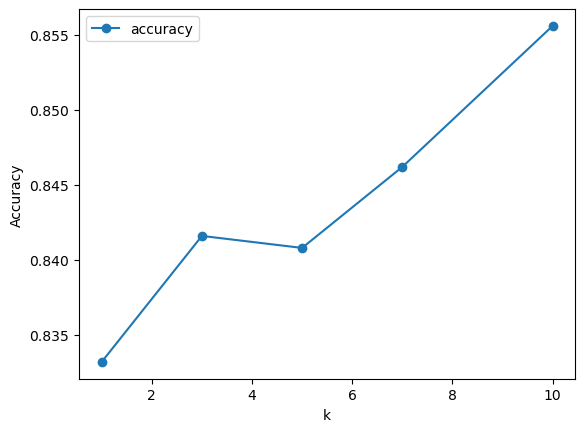

In [401]:
agg_results = pd.DataFrame({'k': [1, 3, 5, 7, 10], 'accuracy': [np.mean(one_nn['accuracy']), np.mean(three_nn['accuracy']), np.mean(five_nn['accuracy']), np.mean(seven_nn['accuracy']), np.mean(ten_nn['accuracy'])]})
print(agg_results)
ax=agg_results.plot('k', 'accuracy', marker = 'o')
ax.set_ylabel("Accuracy")
ax.set_xlabel("k")
plt.savefig("./HW/HW3_KNN_results_plot.png")
print(agg_results.to_latex())

In [457]:
#q5 - logistic regression 5-NN on single split of training/testing 
spam = pd.read_csv("./HW/hw3Data/emails.csv")
spam = spam.drop(['Email No.'], axis = 1)
print(spam.shape)
q5_train = np.arange(0, 4000, 1)
q5_test = np.arange(4000, 5000, 1)

fiveknn = predict_KNN(spam.iloc[q5_train], spam.iloc[q5_test], 5)



(5000, 3001)
(4000, 3001)
(1000, 3001)


In [542]:
lr, lr_preds = logistic_regression(q5_test, np.delete(all_index, q5_test))


1e-06 0
1e-06 1
1e-06 2
1e-06 3
1e-06 4
1e-06 5
1e-06 6
1e-06 7
1e-06 8
1e-06 9
1e-06 10
1e-06 11
1e-06 12


/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/2633864594.py:26: RuntimeWarning: overflow encountered in exp
  a = (1/(1+np.exp(-a)))


1e-06 13
1e-06 14
1e-06 15
1e-06 16
1e-06 17
1e-06 18
1e-06 19
1e-06 20
1e-06 21
1e-06 22
1e-06 23
1e-06 24
1e-06 25
1e-06 26
1e-06 27
1e-06 28
1e-06 29
1e-06 30
1e-06 31
1e-06 32
1e-06 33
1e-06 34
1e-06 35
1e-06 36
1e-06 37
1e-06 38
1e-06 39
1e-06 40
1e-06 41
1e-06 42
1e-06 43
1e-06 44
1e-06 45
1e-06 46
1e-06 47
1e-06 48
1e-06 49
1e-06 50
1e-06 51
1e-06 52
1e-06 53
1e-06 54
1e-06 55
1e-06 56
1e-06 57
1e-06 58
1e-06 59
1e-06 60
1e-06 61
1e-06 62
1e-06 63
1e-06 64
1e-06 65
1e-06 66
1e-06 67
1e-06 68
1e-06 69
1e-06 70
1e-06 71
1e-06 72
1e-06 73
1e-06 74
1e-06 75
1e-06 76
1e-06 77
1e-06 78
1e-06 79
1e-06 80
1e-06 81
1e-06 82
1e-06 83
1e-06 84
1e-06 85
1e-06 86
1e-06 87
1e-06 88
1e-06 89
1e-06 90
1e-06 91
1e-06 92
1e-06 93
1e-06 94
1e-06 95
1e-06 96
1e-06 97
1e-06 98
1e-06 99
1e-06 100
1e-06 101
1e-06 102
1e-06 103
1e-06 104
1e-06 105
1e-06 106
1e-06 107
1e-06 108
1e-06 109
1e-06 110
1e-06 111
1e-06 112
1e-06 113
1e-06 114
1e-06 115
1e-06 116
1e-06 117
1e-06 118
1e-06 119
1e-06 120
1e-06 1

1e-06 844
1e-06 845
1e-06 846
1e-06 847
1e-06 848
1e-06 849
1e-06 850
1e-06 851
1e-06 852
1e-06 853
1e-06 854
1e-06 855
1e-06 856
1e-06 857
1e-06 858
1e-06 859
1e-06 860
1e-06 861
1e-06 862
1e-06 863
1e-06 864
1e-06 865
1e-06 866
1e-06 867
1e-06 868
1e-06 869
1e-06 870
1e-06 871
1e-06 872
1e-06 873
1e-06 874
1e-06 875
1e-06 876
1e-06 877
1e-06 878
1e-06 879
1e-06 880
1e-06 881
1e-06 882
1e-06 883
1e-06 884
1e-06 885
1e-06 886
1e-06 887
1e-06 888
1e-06 889
1e-06 890
1e-06 891
1e-06 892
1e-06 893
1e-06 894
1e-06 895
1e-06 896
1e-06 897
1e-06 898
1e-06 899
1e-06 900
1e-06 901
1e-06 902
1e-06 903
1e-06 904
1e-06 905
1e-06 906
1e-06 907
1e-06 908
1e-06 909
1e-06 910
1e-06 911
1e-06 912
1e-06 913
1e-06 914
1e-06 915
1e-06 916
1e-06 917
1e-06 918
1e-06 919
1e-06 920
1e-06 921
1e-06 922
1e-06 923
1e-06 924
1e-06 925
1e-06 926
1e-06 927
1e-06 928
1e-06 929
1e-06 930
1e-06 931
1e-06 932
1e-06 933
1e-06 934
1e-06 935
1e-06 936
1e-06 937
1e-06 938
1e-06 939
1e-06 940
1e-06 941
1e-06 942
1e-06 943


1e-06 1607
1e-06 1608
1e-06 1609
1e-06 1610
1e-06 1611
1e-06 1612
1e-06 1613
1e-06 1614
1e-06 1615
1e-06 1616
1e-06 1617
1e-06 1618
1e-06 1619
1e-06 1620
1e-06 1621
1e-06 1622
1e-06 1623
1e-06 1624
1e-06 1625
1e-06 1626
1e-06 1627
1e-06 1628
1e-06 1629
1e-06 1630
1e-06 1631
1e-06 1632
1e-06 1633
1e-06 1634
1e-06 1635
1e-06 1636
1e-06 1637
1e-06 1638
1e-06 1639
1e-06 1640
1e-06 1641
1e-06 1642
1e-06 1643
1e-06 1644
1e-06 1645
1e-06 1646
1e-06 1647
1e-06 1648
1e-06 1649
1e-06 1650
1e-06 1651
1e-06 1652
1e-06 1653
1e-06 1654
1e-06 1655
1e-06 1656
1e-06 1657
1e-06 1658
1e-06 1659
1e-06 1660
1e-06 1661
1e-06 1662
1e-06 1663
1e-06 1664
1e-06 1665
1e-06 1666
1e-06 1667
1e-06 1668
1e-06 1669
1e-06 1670
1e-06 1671
1e-06 1672
1e-06 1673
1e-06 1674
1e-06 1675
1e-06 1676
1e-06 1677
1e-06 1678
1e-06 1679
1e-06 1680
1e-06 1681
1e-06 1682
1e-06 1683
1e-06 1684
1e-06 1685
1e-06 1686
1e-06 1687
1e-06 1688
1e-06 1689
1e-06 1690
1e-06 1691
1e-06 1692
1e-06 1693
1e-06 1694
1e-06 1695
1e-06 1696
1e-06 1697

1e-06 2358
1e-06 2359
1e-06 2360
1e-06 2361
1e-06 2362
1e-06 2363
1e-06 2364
1e-06 2365
1e-06 2366
1e-06 2367
1e-06 2368
1e-06 2369
1e-06 2370
1e-06 2371
1e-06 2372
1e-06 2373
1e-06 2374
1e-06 2375
1e-06 2376
1e-06 2377
1e-06 2378
1e-06 2379
1e-06 2380
1e-06 2381
1e-06 2382
1e-06 2383
1e-06 2384
1e-06 2385
1e-06 2386
1e-06 2387
1e-06 2388
1e-06 2389
1e-06 2390
1e-06 2391
1e-06 2392
1e-06 2393
1e-06 2394
1e-06 2395
1e-06 2396
1e-06 2397
1e-06 2398
1e-06 2399
1e-06 2400
1e-06 2401
1e-06 2402
1e-06 2403
1e-06 2404
1e-06 2405
1e-06 2406
1e-06 2407
1e-06 2408
1e-06 2409
1e-06 2410
1e-06 2411
1e-06 2412
1e-06 2413
1e-06 2414
1e-06 2415
1e-06 2416
1e-06 2417
1e-06 2418
1e-06 2419
1e-06 2420
1e-06 2421
1e-06 2422
1e-06 2423
1e-06 2424
1e-06 2425
1e-06 2426
1e-06 2427
1e-06 2428
1e-06 2429
1e-06 2430
1e-06 2431
1e-06 2432
1e-06 2433
1e-06 2434
1e-06 2435
1e-06 2436
1e-06 2437
1e-06 2438
1e-06 2439
1e-06 2440
1e-06 2441
1e-06 2442
1e-06 2443
1e-06 2444
1e-06 2445
1e-06 2446
1e-06 2447
1e-06 2448

1e-06 3104
1e-06 3105
1e-06 3106
1e-06 3107
1e-06 3108
1e-06 3109
1e-06 3110
1e-06 3111
1e-06 3112
1e-06 3113
1e-06 3114
1e-06 3115
1e-06 3116
1e-06 3117
1e-06 3118
1e-06 3119
1e-06 3120
1e-06 3121
1e-06 3122
1e-06 3123
1e-06 3124
1e-06 3125
1e-06 3126
1e-06 3127
1e-06 3128
1e-06 3129
1e-06 3130
1e-06 3131
1e-06 3132
1e-06 3133
1e-06 3134
1e-06 3135
1e-06 3136
1e-06 3137
1e-06 3138
1e-06 3139
1e-06 3140
1e-06 3141
1e-06 3142
1e-06 3143
1e-06 3144
1e-06 3145
1e-06 3146
1e-06 3147
1e-06 3148
1e-06 3149
1e-06 3150
1e-06 3151
1e-06 3152
1e-06 3153
1e-06 3154
1e-06 3155
1e-06 3156
1e-06 3157
1e-06 3158
1e-06 3159
1e-06 3160
1e-06 3161
1e-06 3162
1e-06 3163
1e-06 3164
1e-06 3165
1e-06 3166
1e-06 3167
1e-06 3168
1e-06 3169
1e-06 3170
1e-06 3171
1e-06 3172
1e-06 3173
1e-06 3174
1e-06 3175
1e-06 3176
1e-06 3177
1e-06 3178
1e-06 3179
1e-06 3180
1e-06 3181
1e-06 3182
1e-06 3183
1e-06 3184
1e-06 3185
1e-06 3186
1e-06 3187
1e-06 3188
1e-06 3189
1e-06 3190
1e-06 3191
1e-06 3192
1e-06 3193
1e-06 3194

1e-06 3853
1e-06 3854
1e-06 3855
1e-06 3856
1e-06 3857
1e-06 3858
1e-06 3859
1e-06 3860
1e-06 3861
1e-06 3862
1e-06 3863
1e-06 3864
1e-06 3865
1e-06 3866
1e-06 3867
1e-06 3868
1e-06 3869
1e-06 3870
1e-06 3871
1e-06 3872
1e-06 3873
1e-06 3874
1e-06 3875
1e-06 3876
1e-06 3877
1e-06 3878
1e-06 3879
1e-06 3880
1e-06 3881
1e-06 3882
1e-06 3883
1e-06 3884
1e-06 3885
1e-06 3886
1e-06 3887
1e-06 3888
1e-06 3889
1e-06 3890
1e-06 3891
1e-06 3892
1e-06 3893
1e-06 3894
1e-06 3895
1e-06 3896
1e-06 3897
1e-06 3898
1e-06 3899
1e-06 3900
1e-06 3901
1e-06 3902
1e-06 3903
1e-06 3904
1e-06 3905
1e-06 3906
1e-06 3907
1e-06 3908
1e-06 3909
1e-06 3910
1e-06 3911
1e-06 3912
1e-06 3913
1e-06 3914
1e-06 3915
1e-06 3916
1e-06 3917
1e-06 3918
1e-06 3919
1e-06 3920
1e-06 3921
1e-06 3922
1e-06 3923
1e-06 3924
1e-06 3925
1e-06 3926
1e-06 3927
1e-06 3928
1e-06 3929
1e-06 3930
1e-06 3931
1e-06 3932
1e-06 3933
1e-06 3934
1e-06 3935
1e-06 3936
1e-06 3937
1e-06 3938
1e-06 3939
1e-06 3940
1e-06 3941
1e-06 3942
1e-06 3943

1e-06 4602
1e-06 4603
1e-06 4604
1e-06 4605
1e-06 4606
1e-06 4607
1e-06 4608
1e-06 4609
1e-06 4610
1e-06 4611
1e-06 4612
1e-06 4613
1e-06 4614
1e-06 4615
1e-06 4616
1e-06 4617
1e-06 4618
1e-06 4619
1e-06 4620
1e-06 4621
1e-06 4622
1e-06 4623
1e-06 4624
1e-06 4625
1e-06 4626
1e-06 4627
1e-06 4628
1e-06 4629
1e-06 4630
1e-06 4631
1e-06 4632
1e-06 4633
1e-06 4634
1e-06 4635
1e-06 4636
1e-06 4637
1e-06 4638
1e-06 4639
1e-06 4640
1e-06 4641
1e-06 4642
1e-06 4643
1e-06 4644
1e-06 4645
1e-06 4646
1e-06 4647
1e-06 4648
1e-06 4649
1e-06 4650
1e-06 4651
1e-06 4652
1e-06 4653
1e-06 4654
1e-06 4655
1e-06 4656
1e-06 4657
1e-06 4658
1e-06 4659
1e-06 4660
1e-06 4661
1e-06 4662
1e-06 4663
1e-06 4664
1e-06 4665
1e-06 4666
1e-06 4667
1e-06 4668
1e-06 4669
1e-06 4670
1e-06 4671
1e-06 4672
1e-06 4673
1e-06 4674
1e-06 4675
1e-06 4676
1e-06 4677
1e-06 4678
1e-06 4679
1e-06 4680
1e-06 4681
1e-06 4682
1e-06 4683
1e-06 4684
1e-06 4685
1e-06 4686
1e-06 4687
1e-06 4688
1e-06 4689
1e-06 4690
1e-06 4691
1e-06 4692

0.0947375263157895 156
0.0947375263157895 157
0.0947375263157895 158
0.0947375263157895 159
0.0947375263157895 160
0.0947375263157895 161
0.0947375263157895 162
0.0947375263157895 163
0.0947375263157895 164
0.0947375263157895 165
0.0947375263157895 166
0.0947375263157895 167
0.0947375263157895 168
0.0947375263157895 169
0.0947375263157895 170
0.0947375263157895 171
0.0947375263157895 172
0.0947375263157895 173
0.0947375263157895 174
0.0947375263157895 175
0.0947375263157895 176
0.0947375263157895 177
0.0947375263157895 178
0.0947375263157895 179
0.0947375263157895 180
0.0947375263157895 181
0.0947375263157895 182
0.0947375263157895 183
0.0947375263157895 184
0.0947375263157895 185
0.0947375263157895 186
0.0947375263157895 187
0.0947375263157895 188
0.0947375263157895 189
0.0947375263157895 190
0.0947375263157895 191
0.0947375263157895 192
0.0947375263157895 193
0.0947375263157895 194
0.0947375263157895 195
0.0947375263157895 196
0.0947375263157895 197
0.0947375263157895 198
0.094737526

0.0947375263157895 519
0.0947375263157895 520
0.0947375263157895 521
0.0947375263157895 522
0.0947375263157895 523
0.0947375263157895 524
0.0947375263157895 525
0.0947375263157895 526
0.0947375263157895 527
0.0947375263157895 528
0.0947375263157895 529
0.0947375263157895 530
0.0947375263157895 531
0.0947375263157895 532
0.0947375263157895 533
0.0947375263157895 534
0.0947375263157895 535
0.0947375263157895 536
0.0947375263157895 537
0.0947375263157895 538
0.0947375263157895 539
0.0947375263157895 540
0.0947375263157895 541
0.0947375263157895 542
0.0947375263157895 543
0.0947375263157895 544
0.0947375263157895 545
0.0947375263157895 546
0.0947375263157895 547
0.0947375263157895 548
0.0947375263157895 549
0.0947375263157895 550
0.0947375263157895 551
0.0947375263157895 552
0.0947375263157895 553
0.0947375263157895 554
0.0947375263157895 555
0.0947375263157895 556
0.0947375263157895 557
0.0947375263157895 558
0.0947375263157895 559
0.0947375263157895 560
0.0947375263157895 561
0.094737526

0.1578952105263158 207
0.1578952105263158 208
0.1578952105263158 209
0.1578952105263158 210
0.1578952105263158 211
0.1578952105263158 212
0.1578952105263158 213
0.1578952105263158 214
0.1578952105263158 215
0.1578952105263158 216
0.1578952105263158 217
0.1578952105263158 218
0.1578952105263158 219
0.1578952105263158 220
0.1578952105263158 221
0.1578952105263158 222
0.1578952105263158 223
0.1578952105263158 224
0.1578952105263158 225
0.1578952105263158 226
0.1578952105263158 227
0.1578952105263158 228
0.1578952105263158 229
0.1578952105263158 230
0.1578952105263158 231
0.1578952105263158 232
0.1578952105263158 233
0.1578952105263158 234
0.1578952105263158 235
0.1578952105263158 236
0.1578952105263158 237
0.1578952105263158 238
0.1578952105263158 239
0.1578952105263158 240
0.1578952105263158 241
0.1578952105263158 242
0.1578952105263158 243
0.1578952105263158 244
0.1578952105263158 245
0.1578952105263158 246
0.1578952105263158 247
0.1578952105263158 248
0.1578952105263158 249
0.157895210

0.1736846315789474 206
0.1736846315789474 207
0.1736846315789474 208
0.1736846315789474 209
0.1736846315789474 210
0.1736846315789474 211
0.1736846315789474 212
0.1736846315789474 213
0.1736846315789474 214
0.1736846315789474 215
0.1736846315789474 216
0.1736846315789474 217
0.1736846315789474 218
0.1736846315789474 219
0.1736846315789474 220
0.1736846315789474 221
0.1736846315789474 222
0.1736846315789474 223
0.1736846315789474 224
0.1736846315789474 225
0.1736846315789474 226
0.1736846315789474 227
0.1736846315789474 228
0.1736846315789474 229
0.1736846315789474 230
0.1736846315789474 231
0.1736846315789474 232
0.1736846315789474 233
0.1736846315789474 234
0.1736846315789474 235
0.1736846315789474 236
0.1736846315789474 237
0.1736846315789474 238
0.1736846315789474 239
0.1736846315789474 240
0.1736846315789474 241
0.1736846315789474 242
0.1736846315789474 243
0.1736846315789474 244
0.1736846315789474 245
0.1736846315789474 246
0.1736846315789474 247
0.1736846315789474 248
0.173684631

/var/folders/b2/8cn96b9x6qz0b7b79dn_n_1h0000gn/T/ipykernel_13453/2633864594.py:50: RuntimeWarning: overflow encountered in exp
  test_pred = 1/(1+np.exp(-test_a))


0.846393456518054
0.8155289973818538


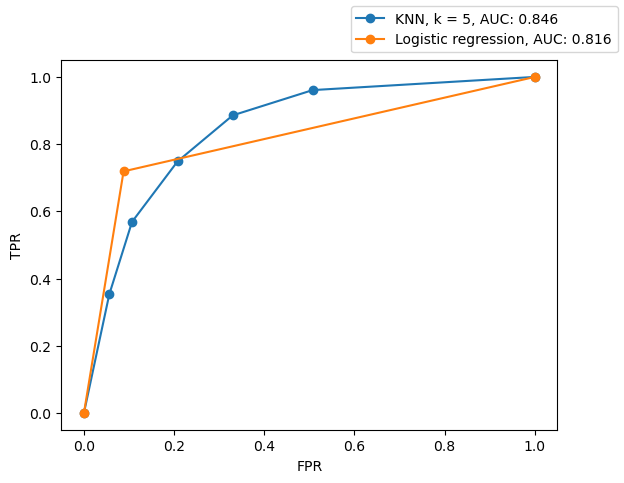

In [544]:
import sklearn as sk
from sklearn import metrics
fpr, tpr, thresholds = sk.metrics.roc_curve(fiveknn['Prediction'], fiveknn['pred'], pos_label=1)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, marker = 'o', label = 'KNN, k = 5, AUC: 0.846')


fpr, tpr, thresholds = sk.metrics.roc_curve(fiveknn['Prediction'], lr_preds, pos_label=1)
ax.plot(fpr, tpr, marker = 'o', label = 'Logistic regression, AUC: 0.816')
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
fig.legend()
print(sk.metrics.roc_auc_score(fiveknn['Prediction'], fiveknn['pred']))
print(sk.metrics.roc_auc_score(fiveknn['Prediction'], lr_preds))
plt.savefig("./HW/HW3_roc_curve.png")